# Mathematical Foundations
**Project Group**: Group 3


## 1. Understand the Dataset Context

•
Objective Clarification: Define the purpose of the analysis and the questions you aim to answer.
•
Data Source Identification: Determine the source of the data, its collection methods, and any relevant background information.

The goal of this analysis is to understand the factors influencing electric vehicle (EV) pricing. The dataset includes a variety of columns that provide detailed information about each vehicle, such as geographical data ('County', 'City', 'State', 'Postal Code', '2020 Census Tract'), vehicle-specific attributes ('VIN (1-10)', 'Make', 'Model', 'Electric Vehicle Type', 'Base MSRP', 'Electric Range', 'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'DOL Vehicle ID', 'Legislative District'), as well as derived features like 'Age of Vehicle', 'Electric Range Category', 'EV Adoption Year', 'Price Category', 'Is Premium Vehicle', 'Vehicle Age', 'Price per Electric Range', and a clustering label ('Cluster'). The analysis aims to explore how different factors such as model year, location, electric range, and vehicle type impact EV pricing, segmenting the market to identify pricing patterns and premium vehicle characteristics. Additionally, clustering techniques are used to group vehicles based on similar attributes, allowing for a deeper understanding of price variations across different segments.

## 2. Import Libraries and Load Data
Import Necessary Libraries: Load libraries such as pandas, numpy, matplotlib, seaborn, etc.
Load the Dataset: Load the dataset into a DataFrame using pandas (assume using Python.

#### 2.1 Read the dataset and import libraries

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import f_regression


In [168]:
population_data = pd.read_csv(r"EV_Population_WA_Data.csv")

In [107]:
population_data.columns

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract',
       'Age of Vehicle', 'Electric Range Category', 'EV Adoption Year',
       'Price Category', 'Is Premium Vehicle', 'Vehicle Age',
       'Price per Electric Range', 'City_Num', 'Cluster'],
      dtype='object')

## 3. Initial Data Inspection
 View Data Structure: Use functions like .head(), .tail(), .info(), and .describe() t 
get a sense of the data structure, types, and summary statistic


• Check Dimensions: Identify the number of rows and columns using .shape(
I
• Identify Missing Values: Use .isnull().sum() to check for missing values.

#### 3.1 Simple data inspections, head, tail, info

In [19]:
print("Print Head")
population_data.head()


Print Head


VIN (1-10)     County          City State  Postal Code  Model Year   Make  \
0  5YJ3E1EB0J   Thurston       Olympia    WA      98512.0        2018  TESLA   
1  WA1AAAGE9M     Kitsap  Port Orchard    WA      98367.0        2021   AUDI   
2  5YJ3E1EA2J     Yakima        Yakima    WA      98902.0        2018  TESLA   
3  5YJ3E1EA4N     Yakima        Yakima    WA      98902.0        2022  TESLA   
4  7SAYGAEE2P  Snohomish       Bothell    WA      98012.0        2023  TESLA   

     Model           Electric Vehicle Type  \
0  MODEL 3  Battery Electric Vehicle (BEV)   
1   E-TRON  Battery Electric Vehicle (BEV)   
2  MODEL 3  Battery Electric Vehicle (BEV)   
3  MODEL 3  Battery Electric Vehicle (BEV)   
4  MODEL Y  Battery Electric Vehicle (BEV)   

   Clean Alternative Fuel Vehicle (CAFV) Eligibility  ...  \
0            Clean Alternative Fuel Vehicle Eligible  ...   
1            Clean Alternative Fuel Vehicle Eligible  ...   
2            Clean Alternative Fuel Vehicle Eligible  ...   
3  Eligibility unknown as battery range has not b...  ...   
4  Eligibility unknown as battery range has not b...  ...   

                  Vehicle Location        Electric Utility  2020 Census Tract  \
0    POINT (-122.957046 46.991391)  PUGET SOUND ENERGY INC       5.306701e+10   
1  POINT (-122.6530052 47.4739066)  PUGET SOUND ENERGY INC       5.303509e+10   
2     POINT (-120.530331 46.59534)              PACIFICORP       5.307700e+10   
3     POINT (-120.530331 46.59534)              PACIFICORP       5.307700e+10   
4    POINT (-122.206146 47.839957)  PUGET SOUND ENERGY INC       5.306105e+10   

   Age of Vehicle Electric Range Category EV Adoption Year  Price Category  \
0               6                  Medium             2018         Economy   
1               3                  Medium             2021         Economy   
2               6                  Medium             2018         Economy   
3               2                     Low             2022         Economy   
4               1                     Low             2023         Economy   

   Is Premium Vehicle Vehicle Age  Price per Electric Range  
0               False           6                       0.0  
1               False           3                       0.0  
2               False           6                       0.0  
3               False           2                       0.0  
4               False           1                       0.0  

[5 rows x 24 columns]

In [20]:
print("Print Tail")
population_data.tail()

Print Tail


VIN (1-10)     County               City State  Postal Code  \
200043  JTMAB3FVXR  Snohomish          Snohomish    WA      98290.0   
200044  7FCTGAAA7P     Pierce             Orting    WA      98360.0   
200045  1V2GNPE87P    Spokane            Spokane    WA      99201.0   
200046  1G1RD6E42E  Snohomish  Mountlake Terrace    WA      98043.0   
200047  5YJ3E1EAXP     Kitsap          Bremerton    WA      98311.0   

        Model Year        Make       Model  \
200043        2024      TOYOTA  RAV4 PRIME   
200044        2023      RIVIAN         R1T   
200045        2023  VOLKSWAGEN        ID.4   
200046        2014   CHEVROLET        VOLT   
200047        2023       TESLA     MODEL 3   

                         Electric Vehicle Type  \
200043  Plug-in Hybrid Electric Vehicle (PHEV)   
200044          Battery Electric Vehicle (BEV)   
200045          Battery Electric Vehicle (BEV)   
200046  Plug-in Hybrid Electric Vehicle (PHEV)   
200047          Battery Electric Vehicle (BEV)   

        Clean Alternative Fuel Vehicle (CAFV) Eligibility  ...  \
200043            Clean Alternative Fuel Vehicle Eligible  ...   
200044  Eligibility unknown as battery range has not b...  ...   
200045  Eligibility unknown as battery range has not b...  ...   
200046            Clean Alternative Fuel Vehicle Eligible  ...   
200047  Eligibility unknown as battery range has not b...  ...   

                       Vehicle Location  \
200043  POINT (-122.0483457 47.9435765)   
200044   POINT (-122.197791 47.0948565)   
200045    POINT (-117.428902 47.658268)   
200046    POINT (-122.306706 47.792043)   
200047     POINT (-122.636245 47.62806)   

                                     Electric Utility  2020 Census Tract  \
200043                         PUGET SOUND ENERGY INC       5.306105e+10   
200044  PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)       5.305307e+10   
200045                  MODERN ELECTRIC WATER COMPANY       5.306300e+10   
200046                         PUGET SOUND ENERGY INC       5.306105e+10   
200047                         PUGET SOUND ENERGY INC       5.303509e+10   

        Age of Vehicle Electric Range Category EV Adoption Year  \
200043               0                     Low             2024   
200044               1                     Low             2023   
200045               1                     Low             2023   
200046              10                     Low             2014   
200047               1                     Low             2023   

        Price Category  Is Premium Vehicle Vehicle Age  \
200043         Economy               False           0   
200044         Economy               False           1   
200045         Economy               False           1   
200046         Economy               False          10   
200047         Economy               False           1   

        Price per Electric Range  
200043                       0.0  
200044                       0.0  
200045                       0.0  
200046                       0.0  
200047                       0.0  

[5 rows x 24 columns]

In [21]:
print("Print info")
population_data.info()

Print info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200048 entries, 0 to 200047
Data columns (total 24 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         200048 non-null  object 
 1   County                                             200044 non-null  object 
 2   City                                               200044 non-null  object 
 3   State                                              200048 non-null  object 
 4   Postal Code                                        200044 non-null  float64
 5   Model Year                                         200048 non-null  int64  
 6   Make                                               200048 non-null  object 
 7   Model                                              200048 non-null  object 
 8   Electric Vehicle Type                              200048 non-n

In [25]:
population_data

VIN (1-10)     County               City State  Postal Code  \
0       5YJ3E1EB0J   Thurston            Olympia    WA      98512.0   
1       WA1AAAGE9M     Kitsap       Port Orchard    WA      98367.0   
2       5YJ3E1EA2J     Yakima             Yakima    WA      98902.0   
3       5YJ3E1EA4N     Yakima             Yakima    WA      98902.0   
4       7SAYGAEE2P  Snohomish            Bothell    WA      98012.0   
...            ...        ...                ...   ...          ...   
200043  JTMAB3FVXR  Snohomish          Snohomish    WA      98290.0   
200044  7FCTGAAA7P     Pierce             Orting    WA      98360.0   
200045  1V2GNPE87P    Spokane            Spokane    WA      99201.0   
200046  1G1RD6E42E  Snohomish  Mountlake Terrace    WA      98043.0   
200047  5YJ3E1EAXP     Kitsap          Bremerton    WA      98311.0   

        Model Year        Make       Model  \
0             2018       TESLA     MODEL 3   
1             2021        AUDI      E-TRON   
2             2018       TESLA     MODEL 3   
3             2022       TESLA     MODEL 3   
4             2023       TESLA     MODEL Y   
...            ...         ...         ...   
200043        2024      TOYOTA  RAV4 PRIME   
200044        2023      RIVIAN         R1T   
200045        2023  VOLKSWAGEN        ID.4   
200046        2014   CHEVROLET        VOLT   
200047        2023       TESLA     MODEL 3   

                         Electric Vehicle Type  \
0               Battery Electric Vehicle (BEV)   
1               Battery Electric Vehicle (BEV)   
2               Battery Electric Vehicle (BEV)   
3               Battery Electric Vehicle (BEV)   
4               Battery Electric Vehicle (BEV)   
...                                        ...   
200043  Plug-in Hybrid Electric Vehicle (PHEV)   
200044          Battery Electric Vehicle (BEV)   
200045          Battery Electric Vehicle (BEV)   
200046  Plug-in Hybrid Electric Vehicle (PHEV)   
200047          Battery Electric Vehicle (BEV)   

        Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
0                 Clean Alternative Fuel Vehicle Eligible             215   
1                 Clean Alternative Fuel Vehicle Eligible             222   
2                 Clean Alternative Fuel Vehicle Eligible             215   
3       Eligibility unknown as battery range has not b...               0   
4       Eligibility unknown as battery range has not b...               0   
...                                                   ...             ...   
200043            Clean Alternative Fuel Vehicle Eligible              42   
200044  Eligibility unknown as battery range has not b...               0   
200045  Eligibility unknown as battery range has not b...               0   
200046            Clean Alternative Fuel Vehicle Eligible              38   
200047  Eligibility unknown as battery range has not b...               0   

        Base MSRP  Legislative District  DOL Vehicle ID  \
0               0                  35.0       104823078   
1               0                  35.0       156660507   
2               0                  14.0       269374108   
3               0                  15.0       213383894   
4               0                   1.0       229496046   
...           ...                   ...             ...   
200043          0                  44.0       262809249   
200044          0                   2.0       252195450   
200045          0                   3.0       227314790   
200046          0                  32.0       170747377   
200047          0                  23.0       224663134   

                       Vehicle Location  \
0         POINT (-122.957046 46.991391)   
1       POINT (-122.6530052 47.4739066)   
2          POINT (-120.530331 46.59534)   
3          POINT (-120.530331 46.59534)   
4         POINT (-122.206146 47.839957)   
...                                 ...   
200043  POINT (-122.0483457 47.9435765)   
200044   POINT (-122.19

#### 3.2 Discriptive Inspections

In [4]:
print("Print Describe")
population_data.describe()

Print Describe


Postal Code     Model Year  Electric Range      Base MSRP  \
count  200044.000000  200048.000000   200048.000000  200048.000000   
mean    98176.178121    2020.871261       53.485279     947.551913   
std      2424.207811       2.994933       88.786301    7860.591091   
min      1731.000000    1997.000000        0.000000       0.000000   
25%     98052.000000    2019.000000        0.000000       0.000000   
50%     98125.000000    2022.000000        0.000000       0.000000   
75%     98372.000000    2023.000000       53.000000       0.000000   
max     99577.000000    2025.000000      337.000000  845000.000000   

       Legislative District  DOL Vehicle ID  2020 Census Tract  
count         199606.000000    2.000480e+05       2.000440e+05  
mean              28.986063    2.262988e+08       5.297545e+10  
std               14.908108    7.282433e+07       1.605628e+09  
min                1.000000    4.385000e+03       1.001020e+09  
25%               17.000000    1.904573e+08       5.303301e+10  
50%               33.000000    2.363396e+08       5.303303e+10  
75%               42.000000    2.609659e+08       5.305307e+10  
max               49.000000    4.792548e+08       5.602100e+10

Electric Range Variability:

The average electric range is approximately 53.49 miles, but with a standard deviation of 88.79 miles, the range of values varies widely, spanning from 0 miles to a maximum of 337 miles.
This suggests that the dataset includes both lower-end electric vehicles, possibly older models or budget-friendly options with limited range, as well as high-performance models that are capable of much longer distances on a single charge.
Such variability can significantly affect consumer perceptions and decisions regarding electric vehicle adoption. For example, consumers may be deterred from purchasing vehicles with low range capabilities due to "range anxiety," the fear that a vehicle has insufficient charge to reach its destination.
Base MSRP Variability:

The average MSRP is reported as $947.55, yet the maximum MSRP reaches an astonishing $845,000, leading to a high standard deviation in prices. This discrepancy suggests the presence of luxury models or specialized electric vehicles, such as high-performance sports cars or bespoke electric vehicles tailored for affluent consumers.
A substantial difference in pricing indicates a diverse market catering to various segments—from budget-conscious buyers to high-end consumers. It raises questions about market positioning and consumer targeting strategies employed by manufacturers.
Implications of Variability:

The significant disparities in both electric range and MSRP might indicate that electric vehicles are not yet fully homogenized in the market. As electric vehicle technology continues to evolve, manufacturers may be targeting niche markets with distinct needs and price points.
From a strategic standpoint, manufacturers and dealers could consider segmenting their marketing efforts based on these variations, tailoring messaging to different consumer demographics based on their electric range needs and price sensitivity.
Conclusion
The wide standard deviations in Electric Range and Base MSRP highlight the diversity and complexity of the electric vehicle market. This analysis underscores the importance of understanding consumer needs and market dynamics to optimize product offerings and marketing strategies. Addressing the range concerns and effectively communicating the value propositions of electric vehicles at various price points could facilitate greater adoption and acceptance of electric vehicles in the broader automotive market.

If you need further details or additional ana

#### 3.3 Null Value , Duplicates and Uniqueness inspections, min and max value counts for Electic Range and MSRP

In [5]:
for i in population_data.columns:
    print("Column:", i,"Has Nulls",population_data[i].isnull().sum())

Column: VIN (1-10) Has Nulls 0
Column: County Has Nulls 4
Column: City Has Nulls 4
Column: State Has Nulls 0
Column: Postal Code Has Nulls 4
Column: Model Year Has Nulls 0
Column: Make Has Nulls 0
Column: Model Has Nulls 0
Column: Electric Vehicle Type Has Nulls 0
Column: Clean Alternative Fuel Vehicle (CAFV) Eligibility Has Nulls 0
Column: Electric Range Has Nulls 0
Column: Base MSRP Has Nulls 0
Column: Legislative District Has Nulls 442
Column: DOL Vehicle ID Has Nulls 0
Column: Vehicle Location Has Nulls 8
Column: Electric Utility Has Nulls 4
Column: 2020 Census Tract Has Nulls 4


In [6]:
count_duplicates = population_data.duplicated().sum()
print(f"Number of duplicate rows: {count_duplicates}") #no dublicate rows

Number of duplicate rows: 0


In [7]:
uniqueness_count = population_data.nunique()
# Calculate the percentage of unique values for each column
uniqueness_percentage = (uniqueness_count / len(population_data)) * 100
# Display the uniqueness percentage along with the column names
for column, percentage in uniqueness_percentage.items():
    print(f"Column: {column}, Unique Percentage: {percentage:.2f}%")

Column: VIN (1-10), Unique Percentage: 5.99%
Column: County, Unique Percentage: 0.10%
Column: City, Unique Percentage: 0.38%
Column: State, Unique Percentage: 0.02%
Column: Postal Code, Unique Percentage: 0.46%
Column: Model Year, Unique Percentage: 0.01%
Column: Make, Unique Percentage: 0.02%
Column: Model, Unique Percentage: 0.08%
Column: Electric Vehicle Type, Unique Percentage: 0.00%
Column: Clean Alternative Fuel Vehicle (CAFV) Eligibility, Unique Percentage: 0.00%
Column: Electric Range, Unique Percentage: 0.05%
Column: Base MSRP, Unique Percentage: 0.02%
Column: Legislative District, Unique Percentage: 0.02%
Column: DOL Vehicle ID, Unique Percentage: 100.00%
Column: Vehicle Location, Unique Percentage: 0.46%
Column: Electric Utility, Unique Percentage: 0.04%
Column: 2020 Census Tract, Unique Percentage: 1.08%


In [8]:
max(population_data['Base MSRP'].value_counts())/len(population_data) * 100

98.33989842437815

In [10]:
max(population_data['Electric Range'].value_counts())/len(population_data) * 100

54.6873750299928

## 4. Data Cleaning
•
Handle Missing Data:
o
Impute Missing Values: Fill missing values using strategies like mean, median, or mode imputation, or domain-specific methods.
o
Remove Missing Values: Drop rows or columns with missing data if appropriate.
•
Handle Outliers:
o
Detect Outliers: Use visualizations (e.g., box plots) or statistical methods (e.g., Z-scores) to identify outliers.
o
Treat Outliers: Depending on the context, either remove, transform, or cap outliers.
•
Correct Data Types: Ensure that each feature has the correct data type (e.g., convert columns to categorical, datetime, etc.).
•
Handle Duplicates: Check for and remove duplicate records.

#### 4.1 Typecasting the dataset and Dropping Nulls

In [137]:
population_data = population_data.astype({
    'VIN (1-10)':'category',
    'Postal Code':'Int64',
    'County': 'category',                                         
   'City': 'category',
    'State': 'category',
    'Postal Code': 'str',
    'Make': 'category',
    'Model': 'category',
    'Electric Vehicle Type': 'category',
    'Clean Alternative Fuel Vehicle (CAFV) Eligibility': 'category',
    'Legislative District': 'Int64',
    'Electric Utility': 'category',
    '2020 Census Tract': 'Int64',
    'Vehicle Location':'str',
    'Base MSRP': 'Int64'
   
})
population_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200048 entries, 0 to 200047
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype   
---  ------                                             --------------   -----   
 0   VIN (1-10)                                         200048 non-null  category
 1   County                                             200044 non-null  category
 2   City                                               200044 non-null  category
 3   State                                              200048 non-null  category
 4   Postal Code                                        200048 non-null  object  
 5   Model Year                                         200048 non-null  int64   
 6   Make                                               200048 non-null  category
 7   Model                                              200048 non-null  category
 8   Electric Vehicle Type                              200048 non-nu

In [12]:
#print("Unique Postal Codes before cleaning:")
#print(population_data['Postal Code'].unique())
#Replacing empty strings with NaN
population_data['Postal Code'].replace('', pd.NA, inplace=True)
# Removing non-numeric characters (if any)
population_data['Postal Code'] = population_data['Postal Code'].astype(str).str.replace(r'\D', '0', regex=True)
# Convert to Int64
# Since NaN will remain as NaN after conversion
population_data['Postal Code'] = population_data['Postal Code'].astype('Int64')
#  Check for NaN values
print("\nNumber of NaN values in Postal Code:", population_data['Postal Code'].isnull().sum())
# Final DataFrame and data types
print("\nFinal DataFrame:")
population_data.info()

C:\Users\fahad\AppData\Local\Temp\ipykernel_20364\3454997442.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  population_data['Postal Code'].replace('', pd.NA, inplace=True)



Number of NaN values in Postal Code: 0

Final DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200048 entries, 0 to 200047
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype   
---  ------                                             --------------   -----   
 0   VIN (1-10)                                         200048 non-null  category
 1   County                                             200044 non-null  category
 2   City                                               200044 non-null  category
 3   State                                              200048 non-null  category
 4   Postal Code                                        200048 non-null  Int64   
 5   Model Year                                         200048 non-null  int64   
 6   Make                                               200048 non-null  category
 7   Model                                              200048 non-null  category
 8   Electr

In [13]:
initial_row_count = population_data.shape[0]
# Drop rows with any missing values
cleaned_data = population_data.dropna()
# Check the final number of rows
final_row_count = cleaned_data.shape[0]
# Calculate the number of rows lost
rows_lost = initial_row_count - final_row_count
# Display resultsv
print(f"Initial rows: {initial_row_count}")
print(f"Final rows after dropna: {final_row_count}")
print(f"Rows lost: {rows_lost}")

Initial rows: 200048
Final rows after dropna: 199606
Rows lost: 442


In [138]:
population_data = population_data.dropna()


In [15]:
population_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 199606 entries, 0 to 200047
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype   
---  ------                                             --------------   -----   
 0   VIN (1-10)                                         199606 non-null  category
 1   County                                             199606 non-null  category
 2   City                                               199606 non-null  category
 3   State                                              199606 non-null  category
 4   Postal Code                                        199606 non-null  Int64   
 5   Model Year                                         199606 non-null  int64   
 6   Make                                               199606 non-null  category
 7   Model                                              199606 non-null  category
 8   Electric Vehicle Type                              199606 non-null  c

#### 4.2 Imputations for the Electric Range and Base MSRP datapoint

In [169]:
sorted_population_data = population_data.sort_values(by='Model Year')
df = sorted_population_data.copy()

In [170]:
df = population_data.copy()
columns_to_replace = ['Base MSRP','Electric Range']

df[columns_to_replace] = df[columns_to_replace].replace(0, np.nan)

population_data = df.copy()

In [171]:
population_data['Base MSRP'] = population_data['Base MSRP'].interpolate(method='linear')
population_data['Electric Range'] =population_data['Electric Range'].interpolate(method='linear')

In [172]:
population_data.describe()

Postal Code     Model Year  Electric Range      Base MSRP  \
count  200044.000000  200048.000000   200048.000000  200042.000000   
mean    98176.178121    2020.871261      118.092963   56913.801777   
std      2424.207811       2.994933       86.480525   18723.479947   
min      1731.000000    1997.000000        6.000000   31950.000000   
25%     98052.000000    2019.000000       35.333333   45465.617523   
50%     98125.000000    2022.000000       93.000000   57442.691430   
75%     98372.000000    2023.000000      204.000000   68424.088754   
max     99577.000000    2025.000000      337.000000  845000.000000   

       Legislative District  DOL Vehicle ID  2020 Census Tract  
count         199606.000000    2.000480e+05       2.000440e+05  
mean              28.986063    2.262988e+08       5.297545e+10  
std               14.908108    7.282433e+07       1.605628e+09  
min                1.000000    4.385000e+03       1.001020e+09  
25%               17.000000    1.904573e+08       5.303301e+10  
50%               33.000000    2.363396e+08       5.303303e+10  
75%               42.000000    2.609659e+08       5.305307e+10  
max               49.000000    4.792548e+08       5.602100e+10

In [164]:
copy_for_further_use = population_data.copy()

In [163]:
copy_for_further_use.describe()

Postal Code     Model Year  Electric Range     Base MSRP  \
count        199606.0  199606.000000   199606.000000      199600.0   
mean   9826382.475978    2020.872333      118.111530  56878.165531   
std      30609.153582       2.995264       86.476374  18708.927931   
min         9800100.0    1997.000000        6.000000       31950.0   
25%         9805200.0    2019.000000       35.333333  45457.827832   
50%         9812500.0    2022.000000       93.000000  57439.583333   
75%         9837200.0    2023.000000      204.000000  68355.769231   
max         9940300.0    2025.000000      337.000000      845000.0   

       Legislative District  DOL Vehicle ID   2020 Census Tract  
count              199606.0    1.996060e+05            199606.0  
mean              28.986063    2.263216e+08  53039903291.532608  
std               14.908108    7.282552e+07      16307596.51022  
min                     1.0    4.385000e+03       53001950100.0  
25%                    17.0    1.904997e+08       53033009900.0  
50%                    33.0    2.363565e+08       53033029902.0  
75%                    42.0    2.609724e+08       53053073122.0  
max                    49.0    4.792548e+08       53077940008.0

In [ ]:
population_data.to_csv('PDdataset.csv')

#### 4.3 Outlier Treatment

Q1 (25th percentile) for Base MSRP: 45457.8278322926
Q3 (75th percentile) for Base MSRP: 68355.76923076923
IQR (Interquartile Range) for Base MSRP: 22897.941398476636


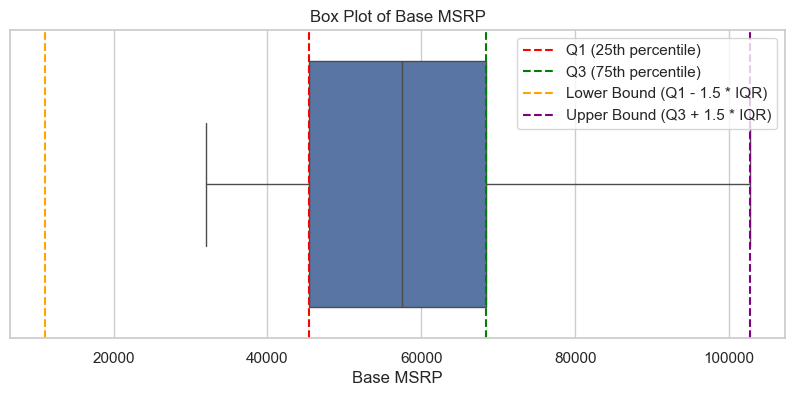

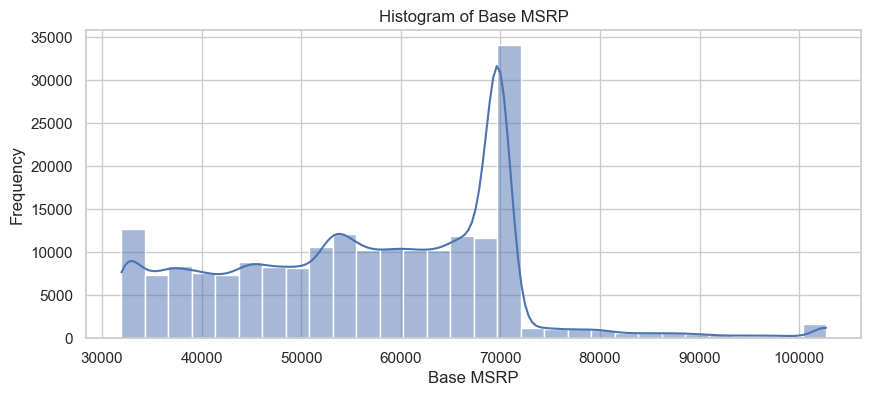

In [150]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile) for Base MSRP
Q1_msrp = population_data['Base MSRP'].quantile(0.25)
Q3_msrp = population_data['Base MSRP'].quantile(0.75)
# Calculate the IQR
IQR_msrp = Q3_msrp - Q1_msrp
# Print the values
print(f"Q1 (25th percentile) for Base MSRP: {Q1_msrp}")
print(f"Q3 (75th percentile) for Base MSRP: {Q3_msrp}")
print(f"IQR (Interquartile Range) for Base MSRP: {IQR_msrp}")

# Set the style for the plots
sns.set(style="whitegrid")

# Create a box plot for Base MSRP
plt.figure(figsize=(10, 4))
sns.boxplot(x=population_data['Base MSRP'])
plt.title('Box Plot of Base MSRP')
plt.xlabel('Base MSRP')
plt.axvline(Q1_msrp, color='red', linestyle='--', label='Q1 (25th percentile)')
plt.axvline(Q3_msrp, color='green', linestyle='--', label='Q3 (75th percentile)')
plt.axvline(Q1_msrp - 1.5 * IQR_msrp, color='orange', linestyle='--', label='Lower Bound (Q1 - 1.5 * IQR)')
plt.axvline(Q3_msrp + 1.5 * IQR_msrp, color='purple', linestyle='--', label='Upper Bound (Q3 + 1.5 * IQR)')
plt.legend()
plt.show()

# Create a histogram for Base MSRP
plt.figure(figsize=(10, 4))
sns.histplot(population_data['Base MSRP'], bins=30, kde=True)
plt.title('Histogram of Base MSRP')
plt.xlabel('Base MSRP')
plt.ylabel('Frequency')
plt.show()


The price tag on new electric vehicles is still higher than gas-powered vehicles. Kelley Blue Book estimates that prices on new EVs dropped from $65,000 in May 2022 to $56,648 in May 2024,

Q1 (25th percentile): 35.333333333333336
Q3 (75th percentile): 204.0
IQR (Interquartile Range): 168.66666666666666


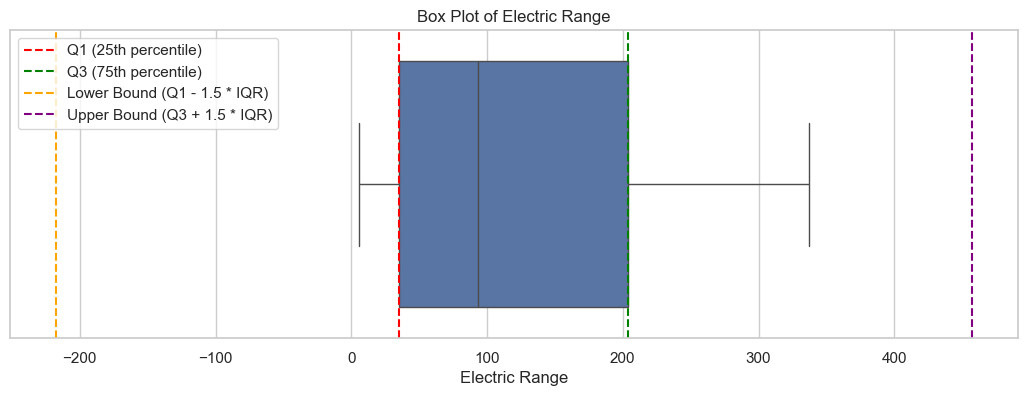

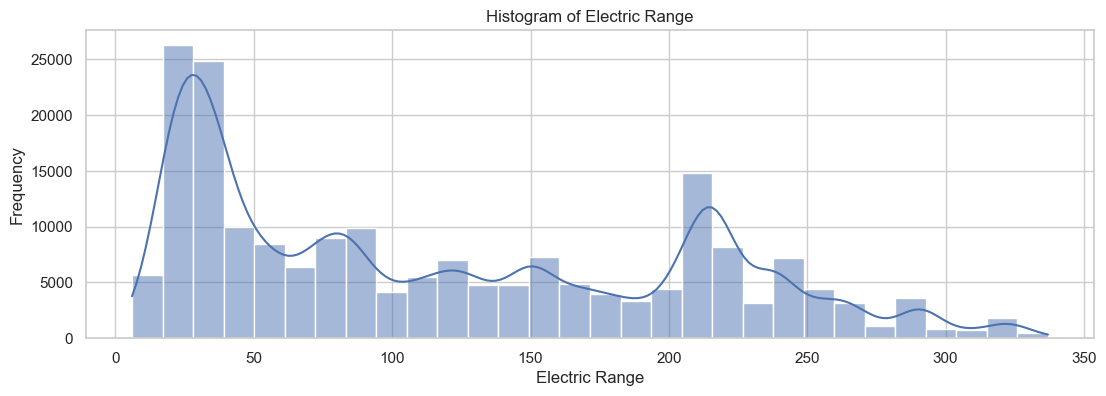

In [144]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = population_data['Electric Range'].quantile(0.25)
Q3 = population_data['Electric Range'].quantile(0.75)

# Calculate the IQR
IQR = Q3 - Q1

# Print the values
print(f"Q1 (25th percentile): {Q1}")
print(f"Q3 (75th percentile): {Q3}")
print(f"IQR (Interquartile Range): {IQR}")

# Set the style for the plots
sns.set(style="whitegrid")

# Create a box plot for Electric Range
plt.figure(figsize=(13, 4))
sns.boxplot(x=population_data['Electric Range'])
plt.title('Box Plot of Electric Range')
plt.xlabel('Electric Range')
plt.axvline(Q1, color='red', linestyle='--', label='Q1 (25th percentile)')
plt.axvline(Q3, color='green', linestyle='--', label='Q3 (75th percentile)')
plt.axvline(Q1 - 1.5 * IQR, color='orange', linestyle='--', label='Lower Bound (Q1 - 1.5 * IQR)')
plt.axvline(Q3 + 1.5 * IQR, color='purple', linestyle='--', label='Upper Bound (Q3 + 1.5 * IQR)')
plt.legend()
plt.show()

# Create a histogram for Electric Range
plt.figure(figsize=(13, 4))
sns.histplot(population_data['Electric Range'], bins=30, kde=True)
plt.title('Histogram of Electric Range')
plt.xlabel('Electric Range')
plt.ylabel('Frequency')
plt.show()

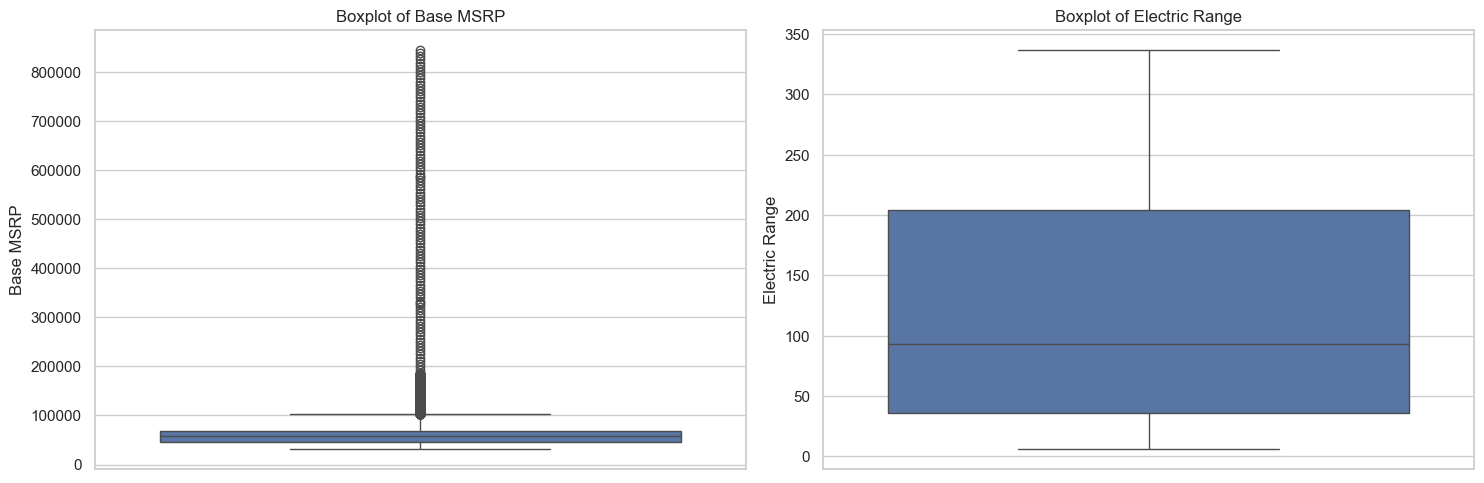

Outliers for Base MSRP:
         VIN (1-10)   County        City State Postal Code  Model Year  \
1571    7SAYGDEE4P     King     Seattle    WA     98107.0        2023   
1572    5YJRE1A1XA     King    Bellevue    WA     98006.0        2010   
1573    7G2CEHED6R     King   Shoreline    WA     98155.0        2024   
1574    5YJ3E1EA6P     King      Renton    WA     98059.0        2023   
1575    WA1H2BFZ9N     King     Seattle    WA     98146.0        2022   
...            ...      ...         ...   ...         ...         ...   
198873  5YJRE1A32A   Pierce  Steilacoom    WA     98388.0        2010   
198874  1N4AZ0CP5D  Whatcom      Blaine    WA     98230.0        2013   
198875  1V2GNPE83P     King    Bellevue    WA     98027.0        2023   
198876  5LMYJ8XY1N     King  Des Moines    WA     98198.0        2022   
198877  7G2CEHEDXR     King    Issaquah    WA     98027.0        2024   

              Make       Model                   Electric Vehicle Type  \
1571         TESLA     M

TypeError: boolean value of NA is ambiguous

In [145]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

class OutlierTreatment:
    def __init__(self, df, columns):
        self.df = df
        self.columns = columns
        self.bounds = {}

        # Calculate IQR bounds for each specified column
        for column in self.columns:
            Q1 = self.df[column].quantile(0.25)
            Q3 = self.df[column].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            self.bounds[column] = (lower_bound, upper_bound)

    def visualize_outliers(self):
        """Visualize outliers using boxplots for each column."""
        plt.figure(figsize=(15, 5))
        for i, column in enumerate(self.columns):
            plt.subplot(1, len(self.columns), i + 1)
            sns.boxplot(self.df[column])
            plt.title(f'Boxplot of {column}')
        plt.tight_layout()
        plt.show()

    def identify_outliers(self):
        """Identify outliers using the IQR method for each column."""
        outliers = {}
        for column in self.columns:
            lower_bound, upper_bound = self.bounds[column]
            outliers[column] = self.df[(self.df[column] < lower_bound) | (self.df[column] > upper_bound)]
        return outliers

    def remove_outliers(self):
        """Remove outliers from the DataFrame for each column."""
        df_no_outliers = self.df.copy()
        for column in self.columns:
            lower_bound, upper_bound = self.bounds[column]
            df_no_outliers = df_no_outliers[(df_no_outliers[column] >= lower_bound) & (df_no_outliers[column] <= upper_bound)]
        return df_no_outliers

    def cap_outliers(self):
        """Cap/floor outliers to the upper and lower bounds for each column."""
        df_capped = self.df.copy()
        for column in self.columns:
            lower_bound, upper_bound = self.bounds[column]
            df_capped[column] = np.where(df_capped[column] > upper_bound, 
                                          upper_bound, 
                                          df_capped[column])
            df_capped[column] = np.where(df_capped[column] < lower_bound, 
                                          lower_bound, 
                                          df_capped[column])
        return df_capped

    def replace_with_mean(self):
        """Replace outliers with the mean value of the column for each column."""
        df_replaced = self.df.copy()
        for column in self.columns:
            mean_value = self.df[column].mean()
            lower_bound, upper_bound = self.bounds[column]
            df_replaced[column] = np.where((df_replaced[column] < lower_bound) | 
                                           (df_replaced[column] > upper_bound), 
                                           mean_value, 
                                           df_replaced[column])
        return df_replaced

# Example Usage
if __name__ == "__main__":

    outlier_handler = OutlierTreatment(population_data, ['Base MSRP', 'Electric Range'])
    
    # Visualize Outliers
    outlier_handler.visualize_outliers()
    
    # Identify Outliers
    outliers = outlier_handler.identify_outliers()
    for column, outlier_data in outliers.items():
        print(f"Outliers for {column}:\n", outlier_data)

    # Remove Outliers
    df_no_outliers = outlier_handler.remove_outliers()
    print("DataFrame without outliers:\n", df_no_outliers)

    # Cap Outliers
    df_capped = outlier_handler.cap_outliers()
    print("DataFrame with capped outliers:\n", df_capped)

    # Replace Outliers with Mean
    df_replaced = outlier_handler.replace_with_mean()
    print("DataFrame with outliers replaced by mean:\n", df_replaced)


In [148]:
df_capped[['Base MSRP','Electric Range']].describe()

Base MSRP  Electric Range
count  199600.000000   199600.000000
mean    56452.799656      118.110015
std     13832.108418       86.476685
min     31950.000000        6.000000
25%     45457.827832       35.333333
50%     57439.583333       93.000000
75%     68355.769231      204.000000
max    102702.681328      337.000000

In [149]:
population_data = df_capped.copy()

In [31]:
population_data.describe()

Postal Code     Model Year  Electric Range      Base MSRP  \
count        199600.0  199600.000000   199600.000000  199600.000000   
mean   9826381.463928    2020.872380      118.110015   56452.799656   
std      30608.496394       2.995251       86.476685   13832.108418   
min         9800100.0    1997.000000        6.000000   31950.000000   
25%         9805200.0    2019.000000       35.333333   45457.827832   
50%         9812500.0    2022.000000       93.000000   57439.583333   
75%         9837200.0    2023.000000      204.000000   68355.769231   
max         9940300.0    2025.000000      337.000000  102702.681328   

       Legislative District  DOL Vehicle ID   2020 Census Tract  
count              199600.0    1.996000e+05            199600.0  
mean              28.986363    2.263234e+08  53039902516.282143  
std                14.90808    7.282424e+07     16307022.229772  
min                     1.0    4.385000e+03       53001950100.0  
25%                    17.0    1.905016e+08       53033009900.0  
50%                    33.0    2.363571e+08       53033029902.0  
75%                    42.0    2.609724e+08       53053073122.0  
max                    49.0    4.792548e+08       53077940008.0

#### 4.4 Adding Additional columuns for feature enginnering

In [32]:
import datetime

# Get the current year
current_year = datetime.datetime.now().year

# 1. Age of Vehicle
population_data['Age of Vehicle'] = current_year - population_data['Model Year']

# 2. Electric Range Category
def classify_range(range_value):
    if range_value <= 100:
        return 'Low'
    elif 100 < range_value <= 250:
        return 'Medium'
    else:
        return 'High'

population_data['Electric Range Category'] = population_data['Electric Range'].apply(classify_range)

# 3. EV Adoption Year
# Assuming EVs are adopted around the model year itself
population_data['EV Adoption Year'] = population_data['Model Year']

# 4. Price Category
def classify_price(msrp):
    if msrp <= 30000:
        return 'Economy'
    elif 30000 < msrp <= 60000:
        return 'Mid-range'
    else:
        return 'Luxury'

population_data['Price Category'] = population_data['Base MSRP'].apply(classify_price)

# 5. Is Premium Vehicle
population_data['Is Premium Vehicle'] = population_data['Price Category'].apply(lambda x: True if x == 'Luxury' else False)

# Display the updated dataset
population_data.head()


VIN (1-10)    County        City State  Postal Code  Model Year    Make  \
6   5YJSA1DPXC  Thurston     Olympia    WA      9850200        2012   TESLA   
7   5YJSA1H27F    Yakima      Yakima    WA      9890800        2015   TESLA   
8   7FCTGBAA7P    Kitsap     Poulsbo    WA      9837000        2023  RIVIAN   
9   3C3CFFGE7H      King     Seattle    WA      9810300        2017    FIAT   
10  1FMCU0LZ4M    Kitsap  Silverdale    WA      9838300        2021    FORD   

      Model                   Electric Vehicle Type  \
6   MODEL S          Battery Electric Vehicle (BEV)   
7   MODEL S          Battery Electric Vehicle (BEV)   
8       R1T          Battery Electric Vehicle (BEV)   
9       500          Battery Electric Vehicle (BEV)   
10   ESCAPE  Plug-in Hybrid Electric Vehicle (PHEV)   

    Clean Alternative Fuel Vehicle (CAFV) Eligibility  ...  \
6             Clean Alternative Fuel Vehicle Eligible  ...   
7             Clean Alternative Fuel Vehicle Eligible  ...   
8   Eligibility unknown as battery range has not b...  ...   
9             Clean Alternative Fuel Vehicle Eligible  ...   
10            Clean Alternative Fuel Vehicle Eligible  ...   

    Legislative District  DOL Vehicle ID                 Vehicle Location  \
6                     22       188634442    POINT (-122.943445 47.059252)   
7                     14       109175566    POINT (-120.611068 46.596645)   
8                     23       262803131  POINT (-122.6368884 47.7469547)   
9                     43         9411349   POINT (-122.3499053 47.673887)   
10                    23       260383966   POINT (-122.7035285 47.660204)   

                                Electric Utility 2020 Census Tract  \
6                         PUGET SOUND ENERGY INC       53067010600   
7                                     PACIFICORP       53077002900   
8                         PUGET SOUND ENERGY INC       53035090400   
9   CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)       53033004600   
10                        PUGET SOUND ENERGY INC       53035091302   

   Age of Vehicle  Electric Range Category  EV Adoption Year Price Category  \
6              12                     High              2012      Mid-range   
7               9                   Medium              2015         Luxury   
8               1                   Medium              2023         Luxury   
9               7                      Low              2017         Luxury   
10              3                      Low              2021         Luxury   

    Is Premium Vehicle  
6                False  
7                 True  
8                 True  
9                 True  
10                True  

[5 rows x 22 columns]

In [33]:
population_data['Vehicle Age'] = current_year - population_data['Model Year']
population_data['Price per Electric Range'] = population_data['Base MSRP'] / population_data['Electric Range'].replace(0, 1)
population_data.describe()

Postal Code     Model Year  Electric Range      Base MSRP  \
count        199600.0  199600.000000   199600.000000  199600.000000   
mean   9826381.463928    2020.872380      118.110015   56452.799656   
std      30608.496394       2.995251       86.476685   13832.108418   
min         9800100.0    1997.000000        6.000000   31950.000000   
25%         9805200.0    2019.000000       35.333333   45457.827832   
50%         9812500.0    2022.000000       93.000000   57439.583333   
75%         9837200.0    2023.000000      204.000000   68355.769231   
max         9940300.0    2025.000000      337.000000  102702.681328   

       Legislative District  DOL Vehicle ID   2020 Census Tract  \
count              199600.0    1.996000e+05            199600.0   
mean              28.986363    2.263234e+08  53039902516.282143   
std                14.90808    7.282424e+07     16307022.229772   
min                     1.0    4.385000e+03       53001950100.0   
25%                    17.0    1.905016e+08       53033009900.0   
50%                    33.0    2.363571e+08       53033029902.0   
75%                    42.0    2.609724e+08       53053073122.0   
max                    49.0    4.792548e+08       53077940008.0   

       Age of Vehicle  EV Adoption Year    Vehicle Age  \
count   199600.000000     199600.000000  199600.000000   
mean         3.127620       2020.872380       3.127620   
std          2.995251          2.995251       2.995251   
min         -1.000000       1997.000000      -1.000000   
25%          1.000000       2019.000000       1.000000   
50%          2.000000       2022.000000       2.000000   
75%          5.000000       2023.000000       5.000000   
max         27.000000       2025.000000      27.000000   

       Price per Electric Range  
count             199600.000000  
mean                1039.123202  
std                 1147.469326  
min                   94.807122  
25%                  298.109000  
50%                  569.418576  
75%                 1487.234043  
max                17117.113555

#### 4.5 Trying to find Legislative discrict in the dataset 

In [171]:
# Extract everything between the parentheses safely
population_data['Coordinates'] = population_data['Vehicle Location'].apply( lambda loc: loc[7:-1] if isinstance(loc, str) else None)
population_data['Coordinates']

0           -122.957046 46.991391
1         -122.6530052 47.4739066
2            -120.530331 46.59534
3            -120.530331 46.59534
4           -122.206146 47.839957
                   ...           
200043    -122.0483457 47.9435765
200044     -122.197791 47.0948565
200045      -117.428902 47.658268
200046      -122.306706 47.792043
200047       -122.636245 47.62806
Name: Coordinates, Length: 200048, dtype: object

In [221]:
from scipy.stats import mstats

# Winsorizing the Electric Range and Base MSRP
population_data['Electric Range'] = mstats.winsorize(population_data['Electric Range'], limits=[0.01, 0.01])  # 1% on both sides
population_data['Base MSRP'] = mstats.winsorize(population_data['Base MSRP'], limits=[0.01, 0.01])  # 1% on both sides

# Show the updated DataFrame
population_data.describe()  # Summary statistics to see the effect


C:\ProgramData\anaconda3\Lib\site-packages\numpy\lib\function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
C:\ProgramData\anaconda3\Lib\site-packages\numpy\lib\function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
C:\ProgramData\anaconda3\Lib\site-packages\numpy\lib\function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
C:\ProgramData\anaconda3\Lib\site-packages\numpy\lib\function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


Model Year  Electric Range      Base MSRP  Legislative District  \
count  200048.000000   200048.000000  200048.000000              199606.0   
mean     2020.871261       53.465823     784.532112             28.986063   
std         2.994933       88.726315    6134.947851             14.908108   
min      1997.000000        0.000000       0.000000                   1.0   
25%      2019.000000        0.000000       0.000000                  17.0   
50%      2022.000000        0.000000       0.000000                  33.0   
75%      2023.000000       53.000000       0.000000                  42.0   
max      2025.000000      322.000000   52900.000000                  49.0   

       DOL Vehicle ID   2020 Census Tract  
count    2.000480e+05            200044.0  
mean     2.262988e+08  52975446524.173584  
std      7.282433e+07   1605628439.899463  
min      4.385000e+03        1001020100.0  
25%      1.904573e+08       53033009801.0  
50%      2.363396e+08       53033029901.0  
75%      2.609659e+08       53053073121.0  
max      4.792548e+08       56021001100.0

In [227]:
population_data.describe()

Postal Code     Model Year  Electric Range  Base MSRP  \
count  162201.000000  162202.000000   162202.000000   162202.0   
mean    98181.411212    2021.463009       13.844453        0.0   
std      2378.834860       2.924180       25.027006        0.0   
min      1731.000000    1997.000000        0.000000        0.0   
25%     98052.000000    2021.000000        0.000000        0.0   
50%     98125.000000    2023.000000        0.000000        0.0   
75%     98373.000000    2023.000000       22.000000        0.0   
max     99577.000000    2025.000000      126.000000        0.0   

       Legislative District  DOL Vehicle ID  2020 Census Tract  
count         161865.000000    1.622020e+05       1.622010e+05  
mean              28.795261    2.282516e+08       5.297766e+10  
std               14.923254    5.376776e+07       1.584139e+09  
min                1.000000    4.385000e+03       1.001020e+09  
25%               17.000000    2.022286e+08       5.303301e+10  
50%               32.000000    2.386739e+08       5.303303e+10  
75%               42.000000    2.606466e+08       5.305307e+10  
max               49.000000    4.792548e+08       5.602100e+10

In [75]:
# Calculate the correlation coefficient
correlation = population_data['Electric Range'].corr(population_data['Base MSRP'])
print('Correlation coefficient:', correlation)

Correlation coefficient: 0.1122063602766857


## 5. Exploratory Data Analysis

#### 5.1 Question

##### Question 1. Which car manufacturers are the most commonly used for EVs in Washington?

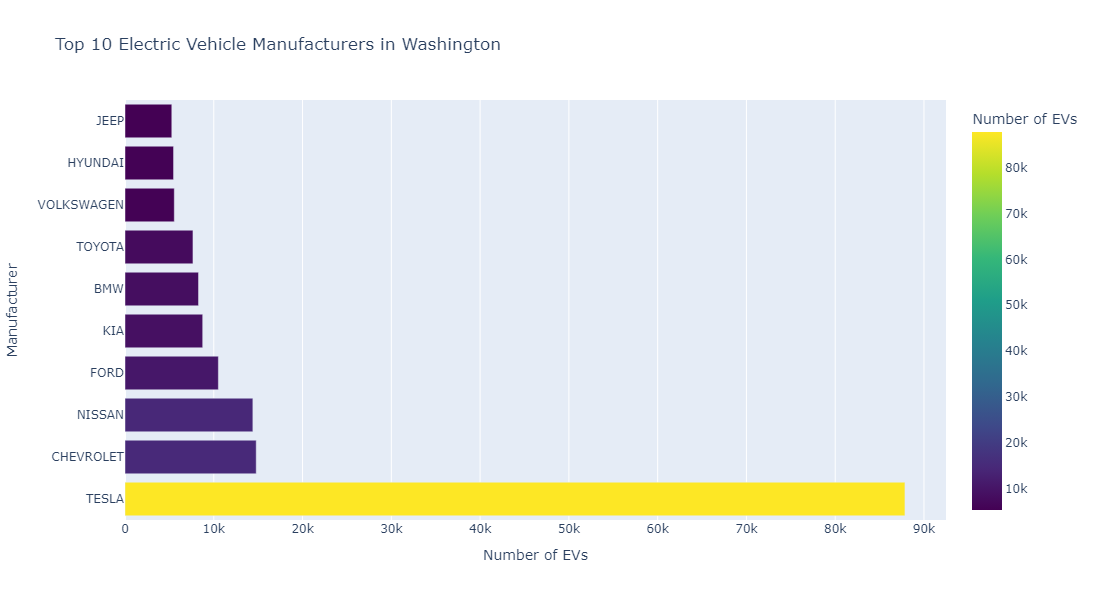

In [35]:
# Step 2: Count the number of EVs by manufacturer and get the top 10
EV_manufacturer_counts = population_data['Make'].value_counts().head(10)

# Step 3: Create a DataFrame for plotting
ev_counts_df = pd.DataFrame({
    'Manufacturer': EV_manufacturer_counts.index,
    'Number of EVs': EV_manufacturer_counts.values
})

# Step 4: Create the bar plot using Plotly with specified figure size
fig = px.bar(ev_counts_df, 
             x='Number of EVs', 
             y='Manufacturer', 
             orientation='h', 
             title='Top 10 Electric Vehicle Manufacturers in Washington',
             labels={'Number of EVs': 'Number of EVs', 'Manufacturer': 'Manufacturer'},
             color='Number of EVs', 
             color_continuous_scale=px.colors.sequential.Viridis,
             width=800,  # Set figure width
             height=600)  # Set figure height

# Show the plot
fig.show()

##### Question 2. What are the highest and lowest electric ranges in this dataset, and which car makers and models do they correspond to?

Highest Electric Range: 337.0 miles
Maker: TESLA, Model: MODEL S
Lowest Electric Range: 6.0 miles
Maker: TOYOTA, Model: PRIUS PLUG-IN


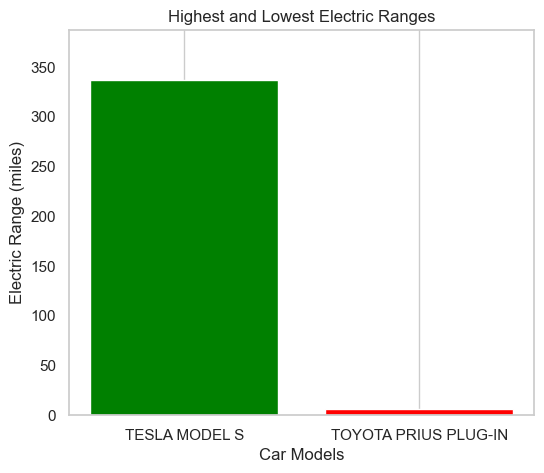

In [38]:
data = population_data.copy()
highest_range = data.loc[data['Electric Range'].idxmax()]
highest_make = highest_range['Make']
highest_model = highest_range['Model']
highest_value = highest_range['Electric Range']
# Find the lowest electric range
lowest_range = data.loc[data['Electric Range'].idxmin()]
lowest_make = lowest_range['Make']
lowest_model = lowest_range['Model']
lowest_value = lowest_range['Electric Range']
# Display results
print(f'Highest Electric Range: {highest_value} miles')
print(f'Maker: {highest_make}, Model: {highest_model}')
print(f'Lowest Electric Range: {lowest_value} miles')
print(f'Maker: {lowest_make}, Model: {lowest_model}')
# Visualization
# Prepare data for visualization
labels = [f'{highest_make} {highest_model}', f'{lowest_make} {lowest_model}']
values = [highest_value, lowest_value]
# Create a bar chart
plt.figure(figsize=(6, 5))
plt.bar(labels, values, color=['green', 'red'])
# Customize the plot
plt.title('Highest and Lowest Electric Ranges')
plt.ylabel('Electric Range (miles)')
plt.xlabel('Car Models')
plt.ylim(0, max(values) + 50)  # Add some space above the highest bar

# Show the plot
plt.grid(axis='y')
plt.show()

##### Question 3. Is the maximum electric range value unique? If not, which cars share this range?

The maximum electric range is 337.0 miles and it is not unique.
All vehicles sharing this range are the same model and maker:
Maker: TESLA, Model: MODEL S


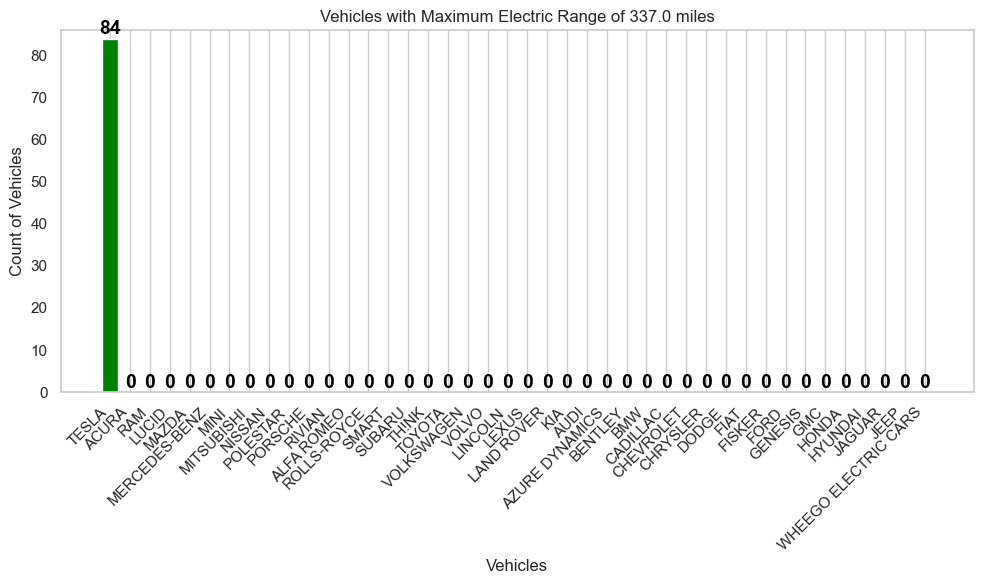

In [39]:
max_range = data['Electric Range'].max()

# Find all vehicles with the maximum electric range
max_range_vehicles = data[data['Electric Range'] == max_range][['Make', 'Model']]

# Check if the maximum range is unique
is_unique = len(max_range_vehicles) == 1

# Display results
if is_unique:
    print(f'The maximum electric range is {max_range} miles and it is unique.')
    print(f'Vehicle: Maker: {max_range_vehicles.iloc[0]["Make"]}, Model: {max_range_vehicles.iloc[0]["Model"]}')
else:
    print(f'The maximum electric range is {max_range} miles and it is not unique.')
    unique_maker_model = max_range_vehicles.drop_duplicates(subset=['Make', 'Model'])
    
    if len(unique_maker_model) == 1:
        print(f'All vehicles sharing this range are the same model and maker:')
        print(f'Maker: {unique_maker_model.iloc[0]["Make"]}, Model: {unique_maker_model.iloc[0]["Model"]}')
    else:
        print('Vehicles sharing this range:')
        for index, row in max_range_vehicles.iterrows():
            print(f'Maker: {row["Make"]}, Model: {row["Model"]}')

# Visualization
plt.figure(figsize=(10, 6))

# Count of vehicles sharing the maximum electric range
vehicle_counts = max_range_vehicles['Make'].value_counts()

# Create a bar chart
bars = plt.bar(vehicle_counts.index, vehicle_counts.values, color='green')

# Customize the plot
plt.title(f'Vehicles with Maximum Electric Range of {max_range} miles')
plt.ylabel('Count of Vehicles')
plt.xlabel('Vehicles')

# Annotate bars with counts
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, 
             yval + 0.1,  # Adjust the height for better visibility
             str(int(yval)), 
             ha='center', 
             va='bottom', 
             fontsize=14,  # Increase font size
             color='black',  # Change color to black for better contrast
             fontweight='bold')  # Make the text bold

plt.xticks(rotation=45, ha='right')

# Show the plot
plt.ylim(0, max(vehicle_counts.values) + 2)  # Set y-axis limit for better visibility
plt.grid(axis='y')
plt.tight_layout()  # Adjust layout to make room for x-axis labels
plt.show()

##### Question 4

Minimum Electric Range: 6.0
Is the minimum electric range unique? No
Cars sharing this range:
          Make          Model  Electric Range
67      TOYOTA  PRIUS PLUG-IN             6.0
135     TOYOTA  PRIUS PLUG-IN             6.0
256     TOYOTA  PRIUS PLUG-IN             6.0
799     TOYOTA  PRIUS PLUG-IN             6.0
824     TOYOTA  PRIUS PLUG-IN             6.0
...        ...            ...             ...
198962  TOYOTA  PRIUS PLUG-IN             6.0
199307  TOYOTA  PRIUS PLUG-IN             6.0
199489  TOYOTA  PRIUS PLUG-IN             6.0
199621  TOYOTA  PRIUS PLUG-IN             6.0
199791  TOYOTA  PRIUS PLUG-IN             6.0

[956 rows x 3 columns]


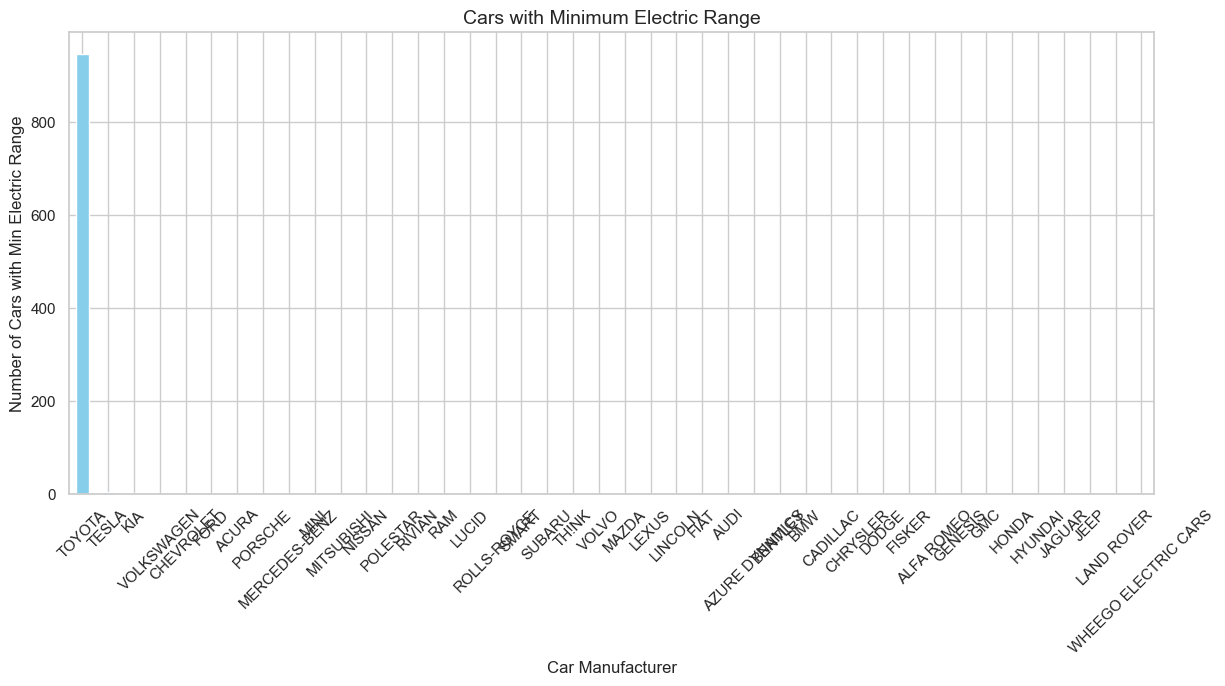

In [40]:
data = population_data.copy()

# The minimum electric range
min_electric_range = data['Electric Range'].min()

# cars that share the minimum electric range
shared_min_range = data[data['Electric Range'] == min_electric_range]

# The minimum electric range is unique
is_unique = shared_min_range.shape[0] == 1

# The results
print(f"Minimum Electric Range: {min_electric_range}")
print(f"Is the minimum electric range unique? {'Yes' if is_unique else 'No'}")
print("Cars sharing this range:")
print(shared_min_range[['Make', 'Model', 'Electric Range']])

# Bivariate Analysis: 
min_range_per_make = shared_min_range['Make'].value_counts()

# Plot the distribution of manufacturers with the minimum electric range
plt.figure(figsize=(14, 6))
min_range_per_make.plot(kind='bar', color='skyblue')
plt.title('Cars with Minimum Electric Range', fontsize=14)
plt.xlabel('Car Manufacturer', fontsize=12)
plt.ylabel('Number of Cars with Min Electric Range', fontsize=12)
plt.xticks(rotation=45)
plt.show()

##### Question 5. How does the electric range vary between car makers and between models?


C:\Users\fahad\AppData\Local\Temp\ipykernel_20364\3001207454.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




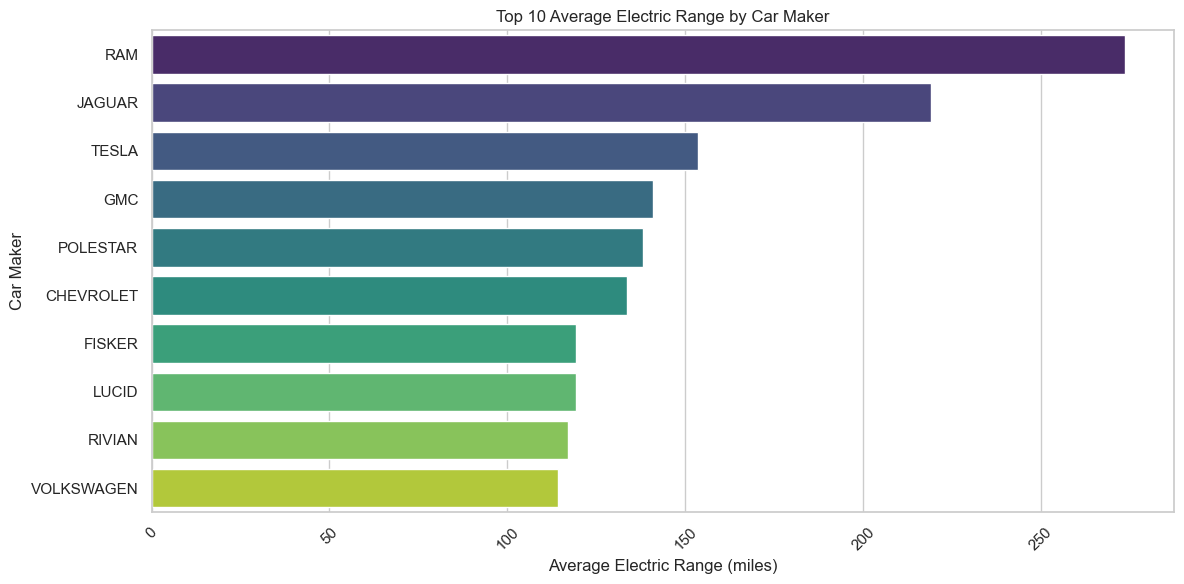

In [174]:
# Group by 'Make' and calculate the average 'Electric Range'
average_range_by_make = population_data.groupby('Make')['Electric Range'].mean().reset_index()

# Sort the results to get the top 10 makers with the highest average electric range
top_10_average_range_by_make = average_range_by_make.sort_values(by='Electric Range', ascending=False).head(10)

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x='Electric Range', y='Make', data=top_10_average_range_by_make, palette='viridis')
plt.title('Top 10 Average Electric Range by Car Maker')
plt.xlabel('Average Electric Range (miles)')
plt.ylabel('Car Maker')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### Question 6. Which are the top 5 cities adopting EVs?


Top 5 Cities Adopting EVs:
City
Seattle      32602
Bellevue      9959
Redmond       7165
Vancouver     7081
Bothell       6601
Name: count, dtype: int64


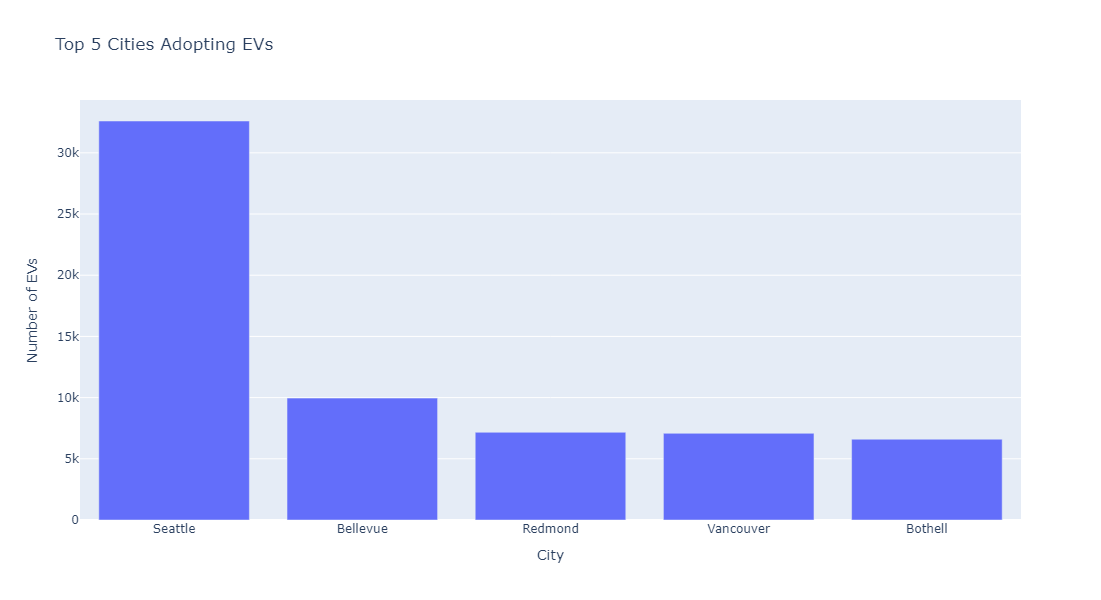

In [43]:
# 6. Top 5 cities adopting EVs
top_cities = population_data['City'].value_counts().head(5)

# Display the results
print("Top 5 Cities Adopting EVs:")
print(top_cities)

# Create a bar chart for top cities
fig6 = px.bar(top_cities, x=top_cities.index, y=top_cities.values,
               title='Top 5 Cities Adopting EVs',
               labels={'x': 'City', 'y': 'Number of EVs'},
                       width=800,  # Set figure width
             height=600)  # Set figure heigh)
fig6.show()


##### Question 7.How does the EV adoption rate vary among car makers over the years?

C:\Users\fahad\AppData\Local\Temp\ipykernel_20364\1935645979.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



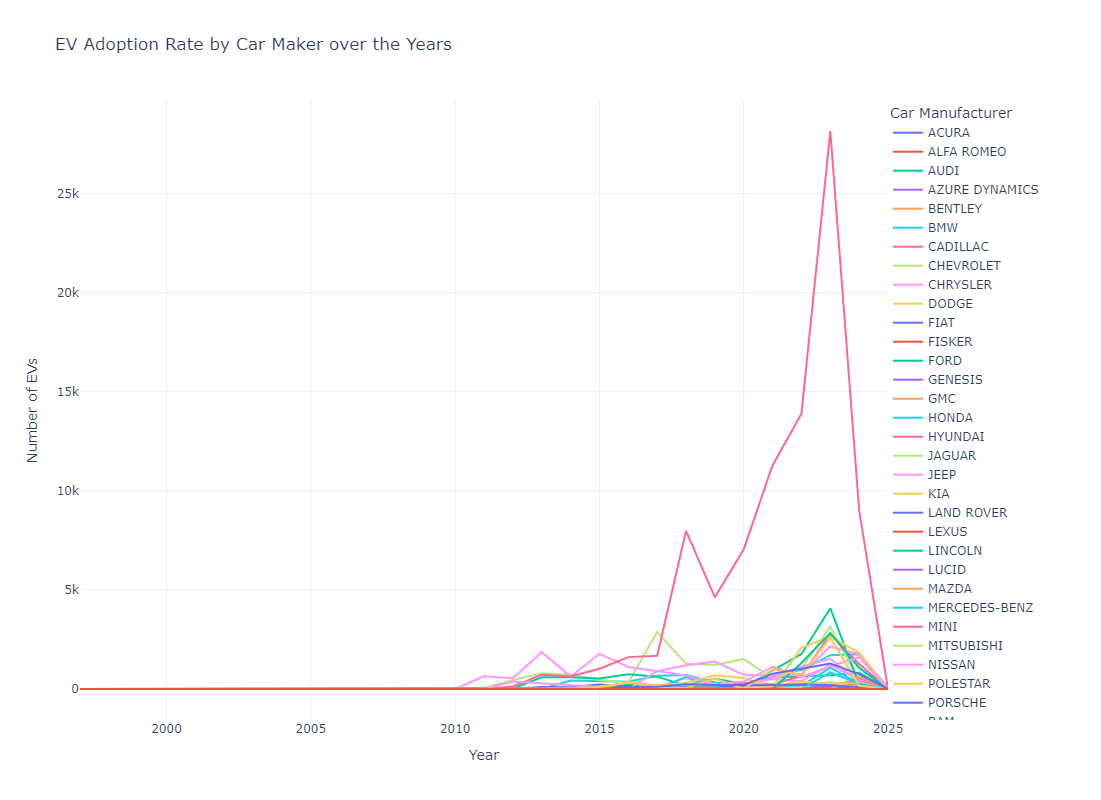

In [44]:
# Assuming population_data is already defined and contains the necessary data
adoption_rate_by_year = population_data.groupby(['Model Year', 'Make']).size().unstack().fillna(0)

# Reset index for better plotting
adoption_rate_by_year = adoption_rate_by_year.reset_index()

# Melt the DataFrame for Plotly compatibility
adoption_rate_melted = adoption_rate_by_year.melt(id_vars='Model Year', var_name='Make', value_name='Number of EVs')

# Create the line plot
fig = px.line(adoption_rate_melted, 
              x='Model Year', 
              y='Number of EVs', 
              color='Make', 
              title='EV Adoption Rate by Car Maker over the Years',
              labels={'Model Year': 'Year', 'Number of EVs': 'Number of EVs'},
              template='plotly_white')

# Update layout
fig.update_layout(
    legend_title_text='Car Manufacturer',
    legend=dict(x=1, y=1, traceorder='normal', orientation='v'),
    width=900,
    height=800
)

# Show the plot
fig.show()

##### Question 8. Is there a correlation between the electric range and the city of an EV?

Correlation between Electric Range and City: -0.024501851977640998
Top 10 Cities with Highest Average Electric Range:
            City  Electric Range
751      Wishram      322.000000
599       Satsop      322.000000
39    Bay Center      291.000000
277       Hatton      266.000000
3           Addy      263.416667
74         Buena      245.285714
163  Deer Harbor      238.000000
535         Pros      232.000000
623    Skamokawa      225.875000
7         Albion      224.500000


C:\Users\fahad\AppData\Local\Temp\ipykernel_20364\1143082284.py:10: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



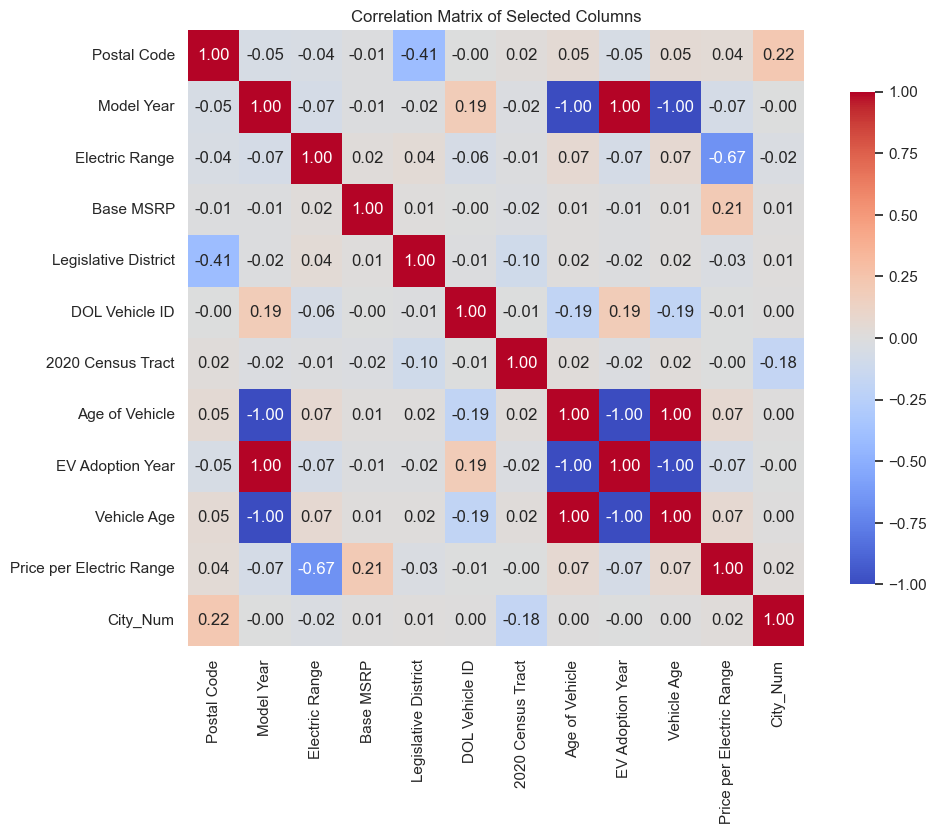

In [45]:
# 8. Correlation between electric range and city
# Converting city names to numeric codes for correlation
population_data['City_Num'] = population_data['City'].astype('category').cat.codes
correlation = population_data[['Electric Range', 'City_Num']].corr().iloc[0, 1]

# Display the results
print("Correlation between Electric Range and City:", correlation)
# Assuming population_data is your DataFrame
# Calculate the average electric range by city
avg_electric_range = population_data.groupby('City')['Electric Range'].mean().reset_index()

# Sort the cities by average electric range and get the top 10
top_10_cities = avg_electric_range.sort_values(by='Electric Range', ascending=False).head(10)

print("Top 10 Cities with Highest Average Electric Range:")
print(top_10_cities)

# Create a correlation matrix for the specified columns
correlation_matrix = population_data[['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 
                                      'Model Year', 'Make', 'Model', 'Electric Vehicle Type',
                                      'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
                                      'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
                                      'Vehicle Location', 'Electric Utility', '2020 Census Tract',
                                      'Age of Vehicle', 'Electric Range Category', 'EV Adoption Year',
                                      'Price Category', 'Is Premium Vehicle', 'Vehicle Age',
                                      'Price per Electric Range', 'City_Num']].select_dtypes(include='number').corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix of Selected Columns')
plt.show()


In [163]:
population_data.columns

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract',
       'Age of Vehicle', 'Electric Range Category', 'EV Adoption Year',
       'Price Category', 'Is Premium Vehicle', 'Vehicle Age',
       'Price per Electric Range', 'City_Num'],
      dtype='object')

##### Question 9. Which county has the greatest variety of EV car models?


In [46]:
county_variety = population_data.groupby('County')['Model'].nunique().sort_values(ascending=False).head(10)
county_variety

C:\Users\fahad\AppData\Local\Temp\ipykernel_20364\3206431692.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



County
King         148
Snohomish    136
Pierce       133
Clark        130
Kitsap       122
Spokane      120
Whatcom      118
Thurston     117
Skagit       104
Island       102
Name: Model, dtype: int64

#### 5.2 Additioanl EDA



In [67]:
categorical_cols = ['VIN (1-10)', 'County', 'City', 'State', 'Make', 'Model', 
                    'Electric Vehicle Type', 'Clean Alternative Fuel Vehicle (CAFV) Eligibility','Vehicle Location',
                    'Electric Utility', 'Electric Range Category', 'EV Adoption Year', 'Price Category', 'Is Premium Vehicle']

le = LabelEncoder()
for col in categorical_cols:
    population_data[col] = le.fit_transform(population_data[col].astype(str))


In [65]:
population_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 199600 entries, 6 to 200047
Data columns (total 25 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         199600 non-null  int32  
 1   County                                             199600 non-null  int32  
 2   City                                               199600 non-null  int32  
 3   State                                              199600 non-null  int32  
 4   Postal Code                                        199600 non-null  Int64  
 5   Model Year                                         199600 non-null  int64  
 6   Make                                               199600 non-null  int32  
 7   Model                                              199600 non-null  int32  
 8   Electric Vehicle Type                              199600 non-null  int32  
 9 

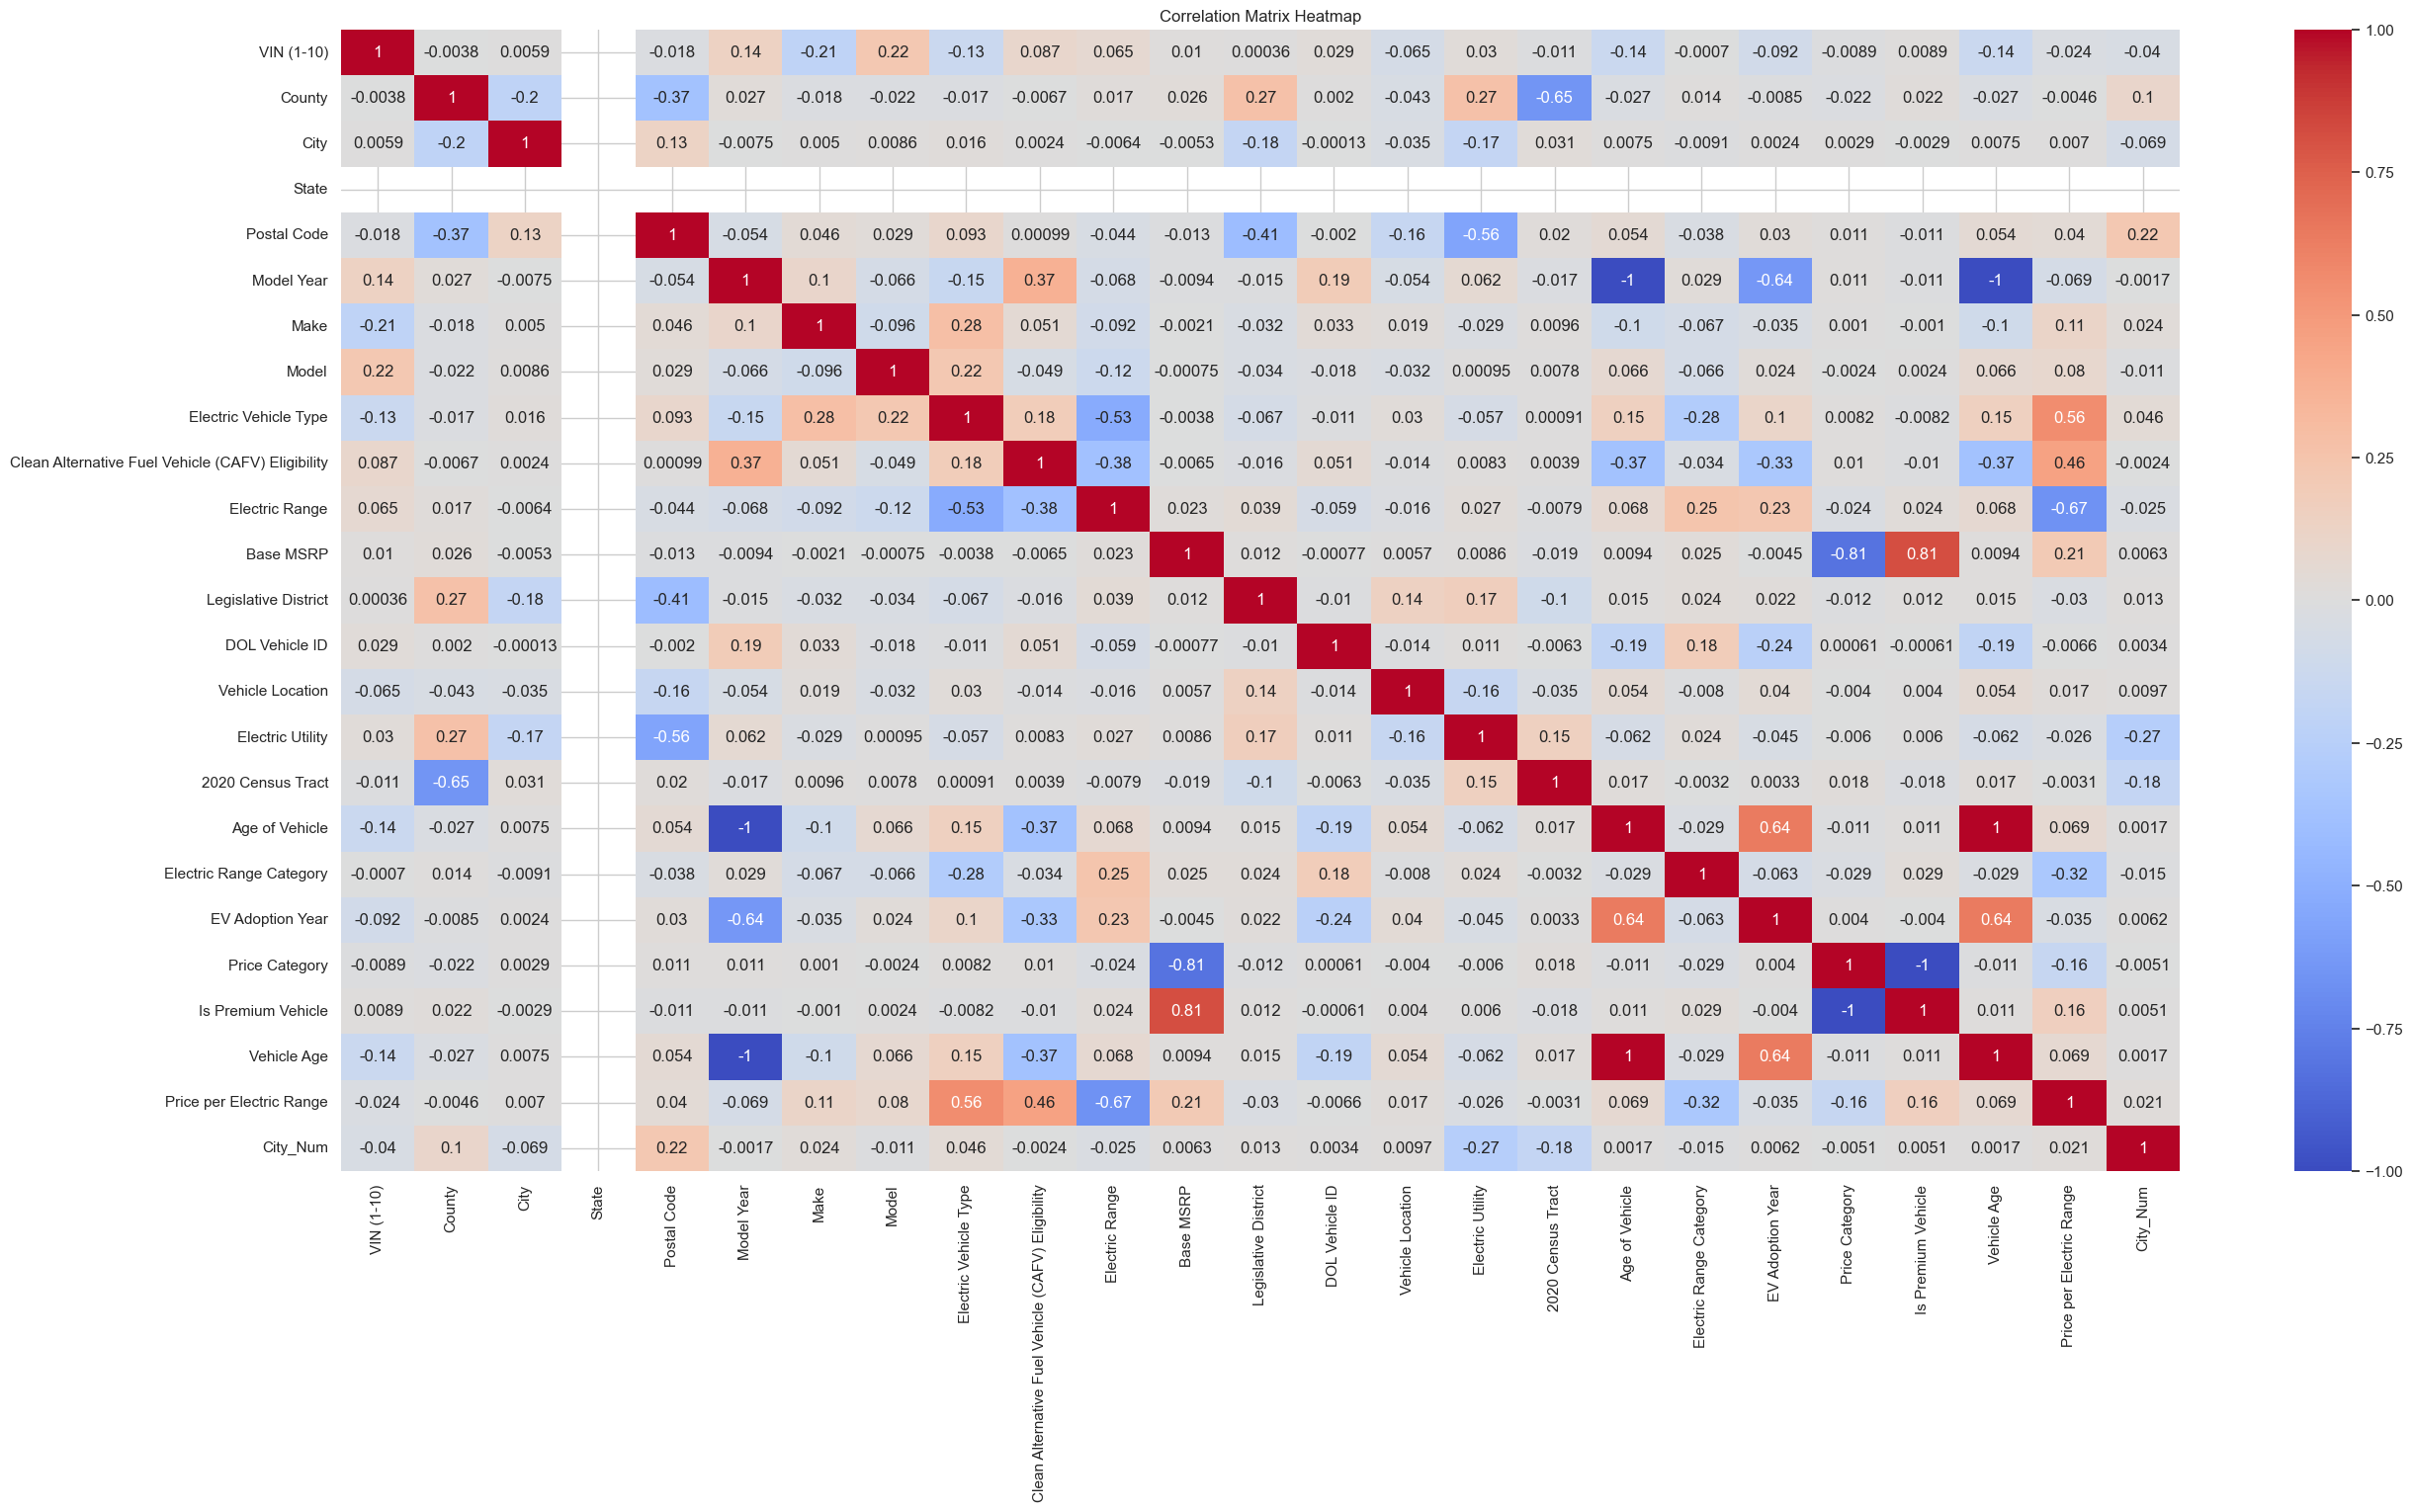

In [73]:
# 3. Correlation Analysis
plt.figure(figsize=(30, 15))
sns.heatmap(population_data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix Heatmap")
plt.show()


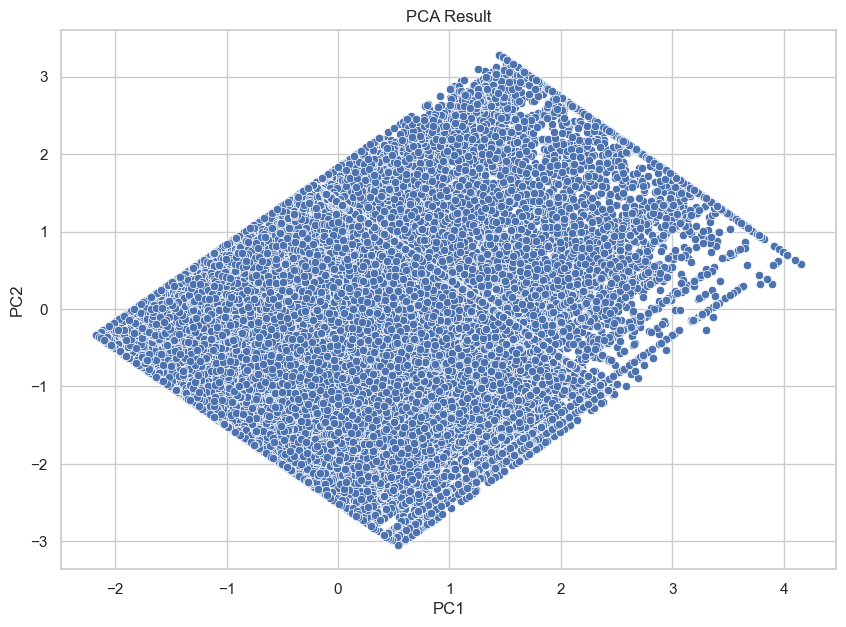

In [111]:
# 4. PCA for Dimensionality Reduction
features = ['Electric Range', 'Base MSRP']
x = population_data[features].fillna(0)  # Filling missing values with 0

# Standardize the features
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(x_scaled)
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

plt.figure(figsize=(10, 7))
sns.scatterplot(x='PC1', y='PC2', data=pca_df)
plt.title('PCA Result')
plt.show()



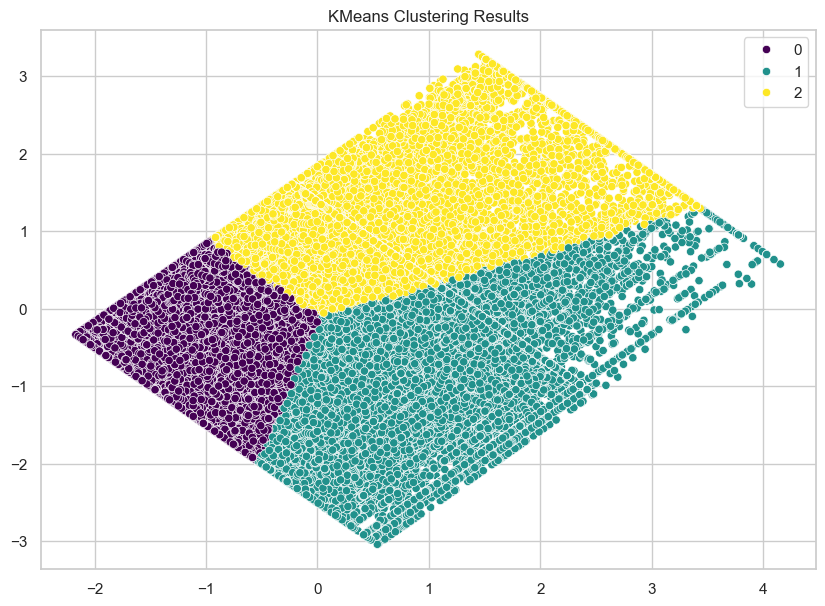

In [112]:
# 5. Clustering Analysis (KMeans)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(x_scaled)
population_data['Cluster'] = kmeans_labels

plt.figure(figsize=(10, 7))
sns.scatterplot(x=principal_components[:, 0], y=principal_components[:, 1], hue=kmeans_labels, palette='viridis')
plt.title('KMeans Clustering Results')
plt.show()


In [76]:
# 6. Multiple Linear Regression
X = population_data[['Vehicle Age', 'Electric Range', 'Model Year']]
y = population_data['Base MSRP']

reg = LinearRegression()
reg.fit(X, y)

print(f"Regression Coefficients: {reg.coef_}")
print(f"Intercept: {reg.intercept_}")

# F-test to understand the significance of features
f_stats, p_values = f_regression(X, y)
print(f"F-statistics: {f_stats}")
print(f"P-values: {p_values}")


Regression Coefficients: [-1.11910672e+13  3.53222656e+00 -1.11910672e+13]
Intercept: 2.2650719940793292e+16
F-statistics: [ 17.7208179  102.28465286  17.72081789]
P-values: [2.55923438e-05 4.87368690e-24 2.55923439e-05]


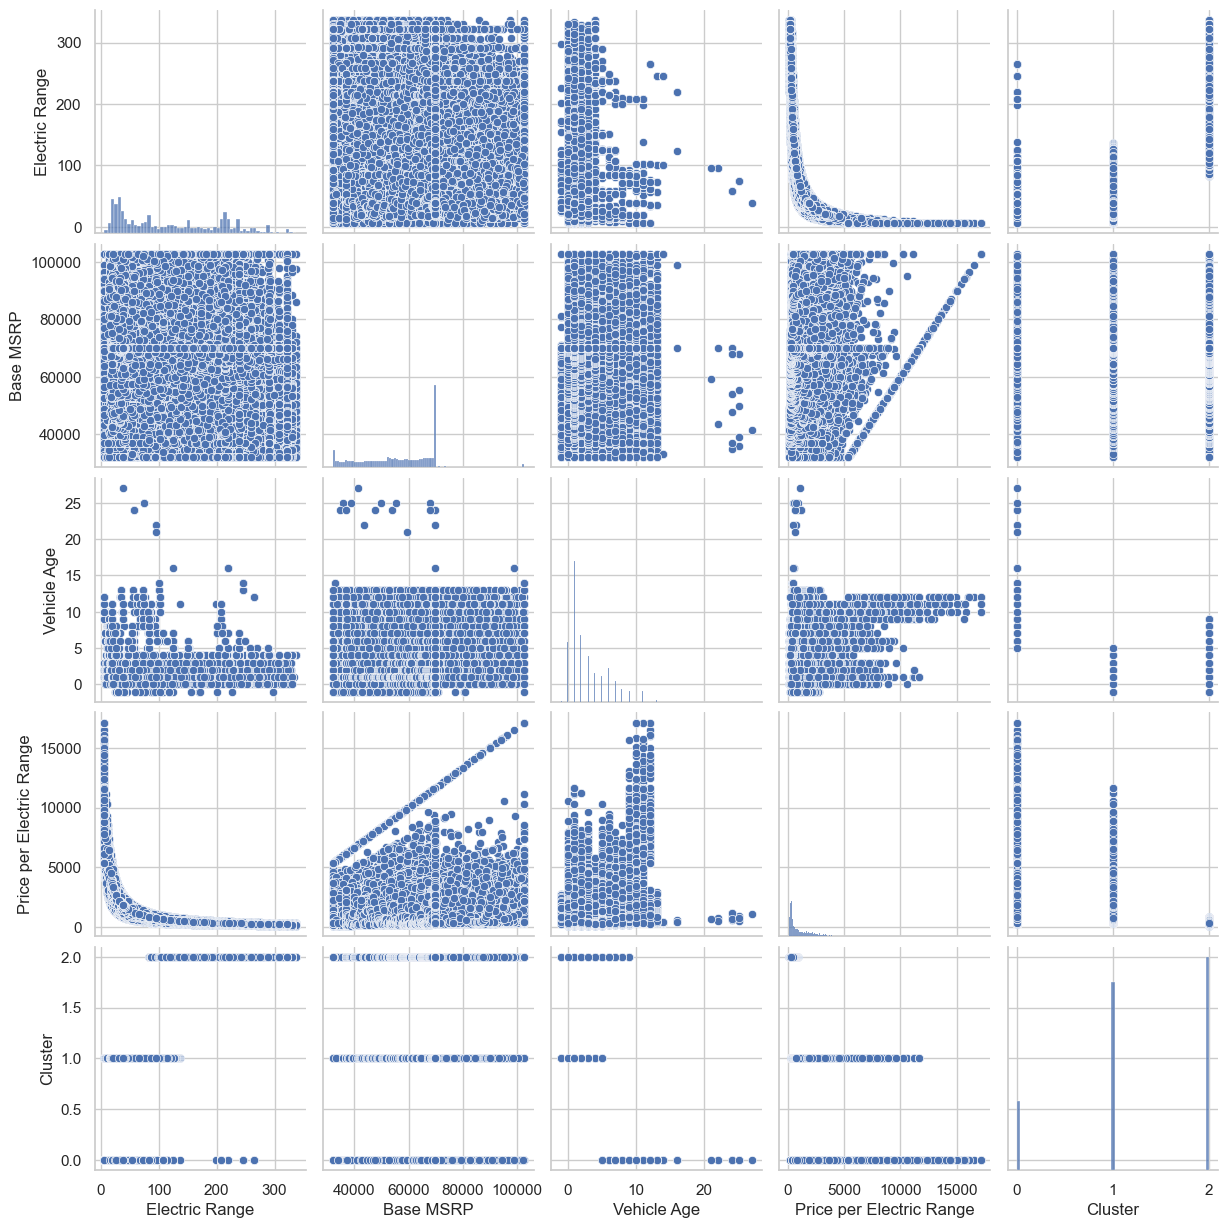

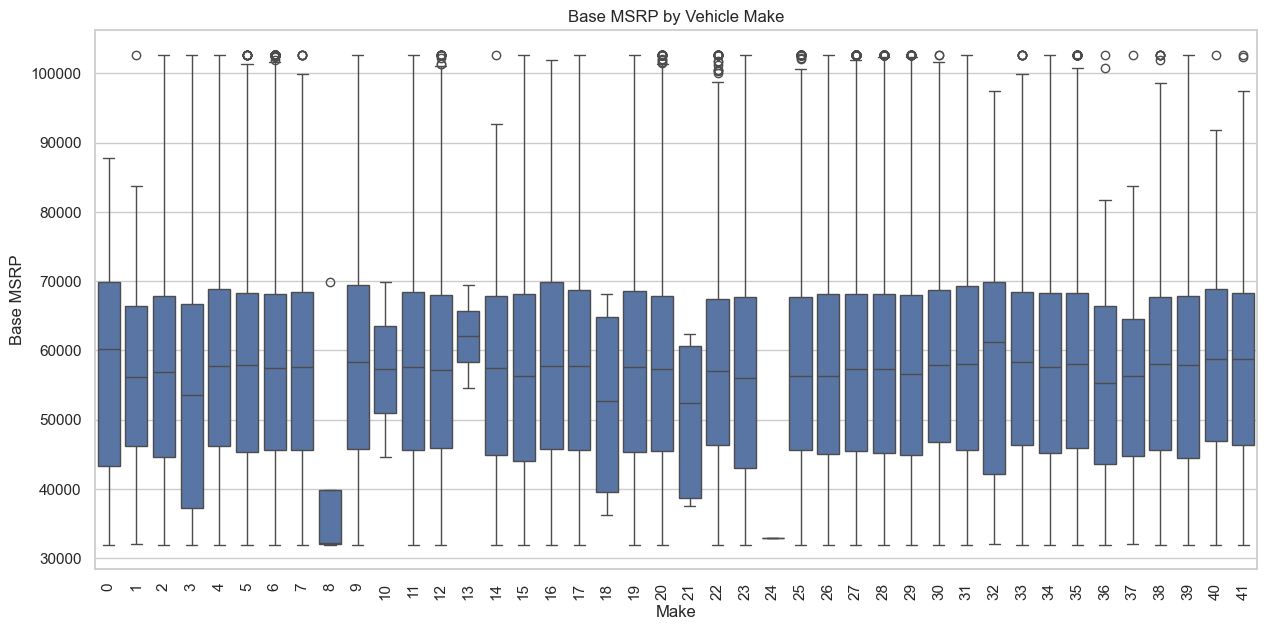

In [77]:
# 9. Pair Plot for Exploratory Analysis
sns.pairplot(population_data[['Electric Range', 'Base MSRP', 'Vehicle Age', 'Price per Electric Range', 'Cluster']])
plt.show()

# 10. Boxplot for Price by Make
plt.figure(figsize=(15, 7))
sns.boxplot(x='Make', y='Base MSRP', data=population_data)
plt.xticks(rotation=90)
plt.title('Base MSRP by Vehicle Make')
plt.show()


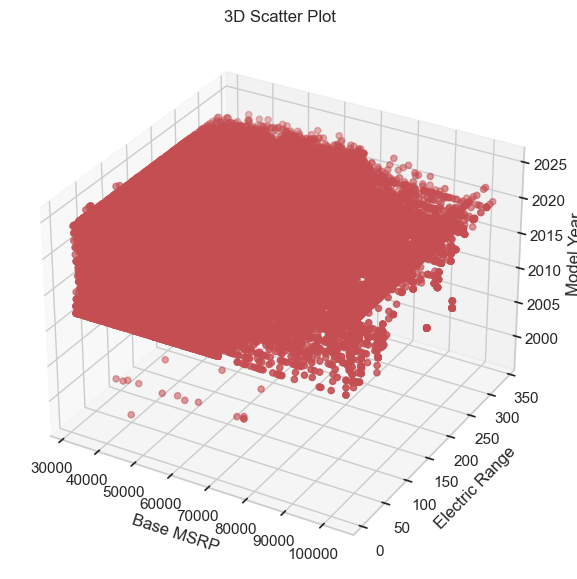

In [78]:
# 11. 3D Scatter Plot
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(population_data['Base MSRP'], population_data['Electric Range'], population_data['Model Year'], c='r', marker='o')
ax.set_xlabel('Base MSRP')
ax.set_ylabel('Electric Range')
ax.set_zlabel('Model Year')
plt.title('3D Scatter Plot')
plt.show()

#### 5.3 Multivariate Analysis
•
Pairplot/Scatterplot Matrix: Use to visualize relationships between multiple numerical variables.
•
Multivariate Statistics: Explore techniques like Principal Component Analysis (PCA) for dimensionality reduction.
•
Advanced Visualizations: Consider using more complex visualizations like pairwise correlation heatmaps or 3D plots.


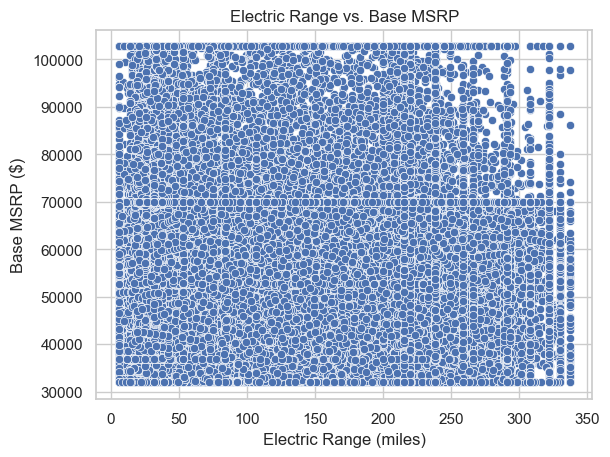

In [79]:
# Create a scatter plot
sns.scatterplot(x='Electric Range', y='Base MSRP', data=population_data)
plt.title('Electric Range vs. Base MSRP')
plt.xlabel('Electric Range (miles)')
plt.ylabel('Base MSRP ($)')
plt.show()

## 6. Feature Engineering
•
Create New Features: Based on domain knowledge or interaction terms.
•
Feature Transformation: Normalize or standardize features, apply log transformations, etc.
•
Encoding Categorical Variables: Convert categorical variables to numerical using techniques like one-hot encoding, label encoding, or frequency encoding.

#### 6.1 Preparing the dataset and selecting relevent columns

In [97]:
population_data.describe()

Postal Code     Model Year  Electric Range      Base MSRP  \
count  200038.000000  200042.000000   200042.000000  200042.000000   
mean    98176.165394    2020.871307      118.091451   56490.505592   
std      2424.242347       2.994920       86.480836   13869.312174   
min      1731.000000    1997.000000        6.000000   31950.000000   
25%     98052.000000    2019.000000       35.333333   45465.617523   
50%     98125.000000    2022.000000       93.000000   57442.691430   
75%     98372.000000    2023.000000      204.000000   68424.088754   
max     99577.000000    2025.000000      337.000000  102861.795602   

       Legislative District  DOL Vehicle ID  2020 Census Tract  \
count         199600.000000    2.000420e+05       2.000380e+05   
mean              28.986363    2.263007e+08       5.297544e+10   
std               14.908080    7.282304e+07       1.605652e+09   
min                1.000000    4.385000e+03       1.001020e+09   
25%               17.000000    1.904591e+08       5.303301e+10   
50%               33.000000    2.363406e+08       5.303303e+10   
75%               42.000000    2.609659e+08       5.305307e+10   
max               49.000000    4.792548e+08       5.602100e+10   

       Age of Vehicle  EV Adoption Year    Vehicle Age  \
count   200042.000000     200042.000000  200042.000000   
mean         3.128693       2020.871307       3.128693   
std          2.994920          2.994920       2.994920   
min         -1.000000       1997.000000      -1.000000   
25%          1.000000       2019.000000       1.000000   
50%          2.000000       2022.000000       2.000000   
75%          5.000000       2023.000000       5.000000   
max         27.000000       2025.000000      27.000000   

       Price per Electric Range  
count             200042.000000  
mean                1040.006679  
std                 1148.788752  
min                   94.807122  
25%                  298.379826  
50%                  570.242076  
75%                 1487.234043  
max                17143.632600

In [98]:
population_data = population_data.dropna(subset=['Base MSRP'])
columns_to_keep = [
    'Model Year',
    'Make',
    'Model',
    'Electric Vehicle Type',
    'Clean Alternative Fuel Vehicle (CAFV) Eligibility',
    'Electric Range',
   'Base MSRP',
    'Electric Utility', 
    'Age of Vehicle', 
    'Electric Range Category', 
    'EV Adoption Year',
    'Price Category', 
    'Is Premium Vehicle'
]

# Create a new DataFrame with only the selected columns
population_data_filtered = population_data[columns_to_keep]


#### 6.2 Encoding the dataset
One-hot encoding is used to convert categorical variables into numeric form, which machine learning models require. It’s preferred because it doesn’t assume any order between categories, preventing bias that might occur if categorical values were assigned arbitrary numbers. It creates separate binary columns for each category, allowing models to treat them independently.







In [99]:
# Convert categorical columns to numeric using one-hot encoding
population_data_encoded = pd.get_dummies(population_data_filtered, drop_first=True)


#### 6.3 Adding extra features

In [100]:
# Feature Creation
current_year = pd.to_datetime('now').year
population_data_encoded['Vehicle Age'] = current_year - population_data_encoded['Model Year']
population_data_encoded['Price per Electric Range'] = population_data_encoded['Base MSRP'] / population_data_encoded['Electric Range'].replace(0, 1)


#### 6.4 Prepare Data for using feature scaling 
StandardScaler scales the features so that they have a mean of 0 and a standard deviation of 1.
This is useful because many machine learning models perform better when numerical features are on a similar scale, preventing some features from dominating others.

StandardScaler can be used for non-normalized data. In fact, it's designed to work with data that is not on the same scale. It standardizes features by removing the mean and scaling to unit variance, making it suitable for most types of data, even if they aren't initially normalized.



In [101]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
features_to_scale = [ 'Base MSRP','Electric Range', 'Vehicle Age']
population_data_encoded[features_to_scale] = scaler.fit_transform(population_data_encoded[features_to_scale])
# Prepare data for modeling
X = population_data_encoded.drop('Base MSRP', axis=1)
y = population_data_encoded['Base MSRP']

#### 6.5 Feature Selection Using Random Forest
 Initialize the Random Forest Regressor
RandomForestRegressor(n_estimators=100, random_state=42) initializes the model.
n_estimators=100 specifies the number of decision trees in the forest.
random_state=42 ensures consistent results by controlling randomness in the model.
Why use random forest?
Random Forest: It's an ensemble model consisting of multiple decision trees. It captures non-linear relationships by combining several trees, each trained on different parts of the data.

Makes no specific assumptions about the data distribution or the relationship between features and target.

Provides feature importance scores based on how features impact decision splits, which can be used for feature selection and captures interactions naturally.


In [102]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [103]:
# Get feature importances
importances = rf_model.feature_importances_


In [104]:
# Create a DataFrame for feature importances
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
# Display the top 10 features
top_10_features = feature_importances.head(20)
print(top_10_features)


#### 6.6 Visualizing the top 10 Features

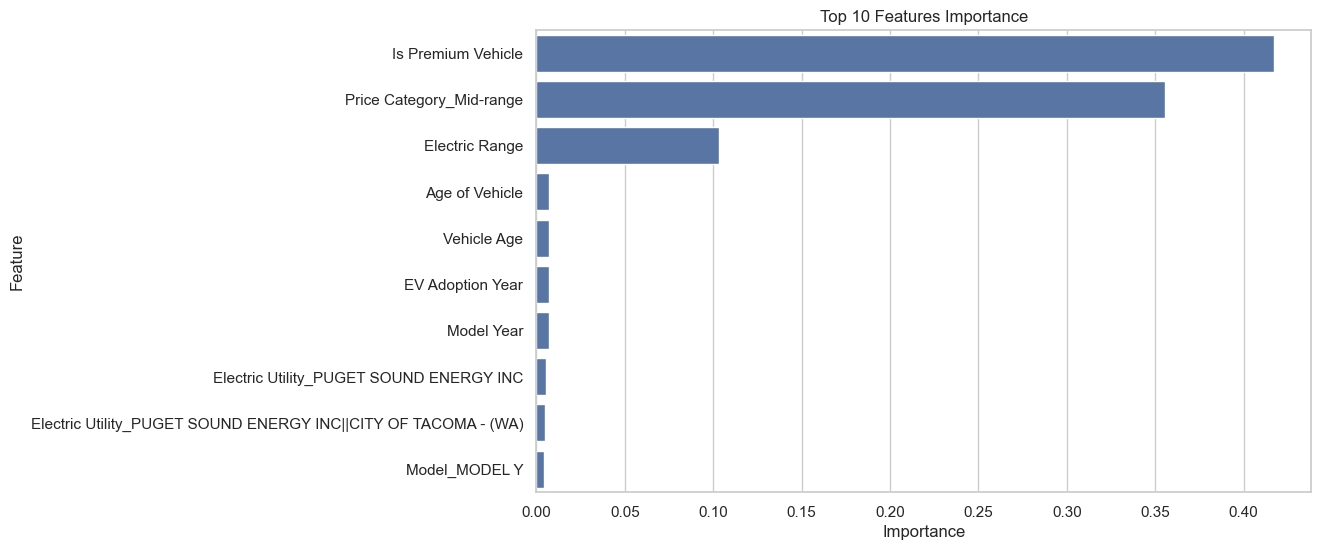

In [106]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=top_10_features)
plt.title('Top 10 Features Importance')
plt.show()

In [106]:
population_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 199600 entries, 6 to 200047
Data columns (total 26 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         199600 non-null  int32  
 1   County                                             199600 non-null  int32  
 2   City                                               199600 non-null  int32  
 3   State                                              199600 non-null  int32  
 4   Postal Code                                        199600 non-null  Int64  
 5   Model Year                                         199600 non-null  int64  
 6   Make                                               199600 non-null  int32  
 7   Model                                              199600 non-null  int32  
 8   Electric Vehicle Type                              199600 non-null  int32  
 9 

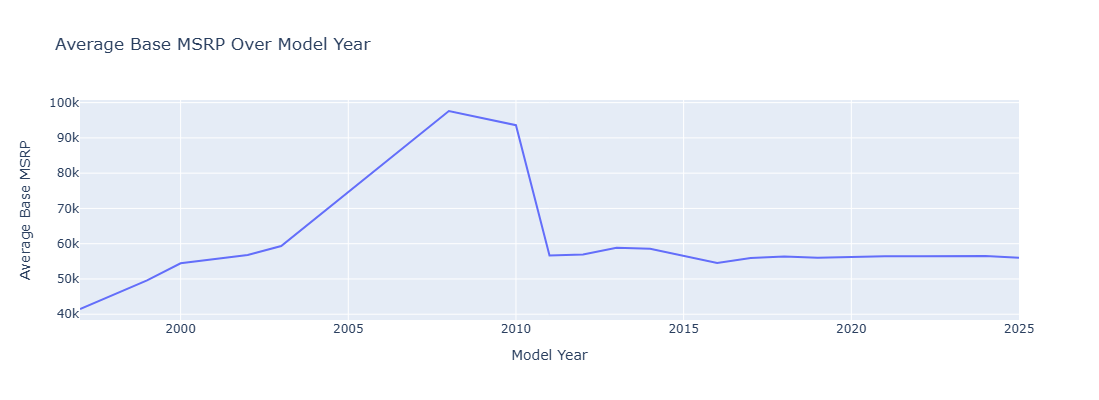

In [105]:
import plotly.express as px

# Grouping by 'Model Year' and calculating the average of 'Base MSRP'
average_msrp = population_data.groupby('Model Year')['Base MSRP'].mean().reset_index()

# Creating the trend chart for the average 'Base MSRP' over 'Model Year'
fig = px.line(average_msrp, x='Model Year', y='Base MSRP', title='Average Base MSRP Over Model Year')
fig.update_layout(
    xaxis_title='Model Year',
    yaxis_title='Average Base MSRP',
    showlegend=False,
    width=600,   # Set the width of the figure
    height=400   # Set the height of the figure
)

# Displaying the chart
fig.show()


## 7. Handle Imbalanced Data (If Applicable)
•
Resampling Techniques: Use oversampling, under-sampling, or SMOTE if the target variable is imbalanced.

## 8. Analyze and Validate Assumptions
•
Check for Multicollinearity: Use VIF (Variance Inflation Factor) to detect multicollinearity among predictors.
•
Normality Testing: Test if numerical data follows a normal distribution (e.g., using the Shapiro-Wilk test).
•
Homoscedasticity: Check the equality of variance across groups.

In [50]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.graphics.gofplots import qqplot
import statsmodels.api as sm


#### 8.1 Multicollinearity Check 
IT refers to a situation in regression analysis where two or more predictor variables are highly correlated with each other. This high correlation can create problems in estimating the relationship between each predictor and the response variable. Here are some key points about multicollinearity:



In [90]:
# Step 3: Multicollinearity Check
features = population_data[['Base MSRP', 'Model Year']]  # Adjust based on your data
features = sm.add_constant(features)

vif_data = pd.DataFrame()
vif_data["Feature"] = features.columns
vif_data["VIF"] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]
print("\nVariance Inflation Factors:")
print(vif_data)


Variance Inflation Factors:
      Feature            VIF
0       const  455321.764091
1   Base MSRP       1.000089
2  Model Year       1.000089


#### 8.2  Normality Testing

IT refers to a situation in regression analysis where two or more predictor variables are highly correlated with each other. This high correlation can create problems in estimating the relationship between each predictor and the response variable. Here are some key points about multicollinearity:



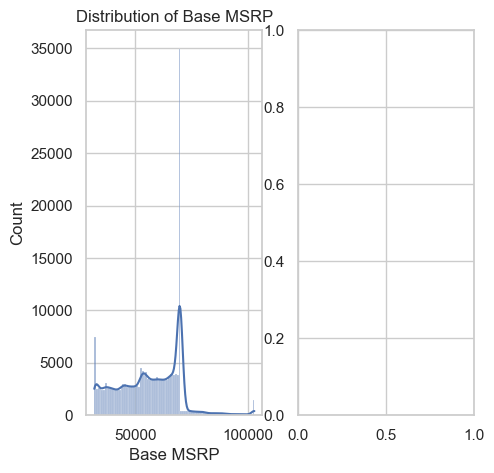

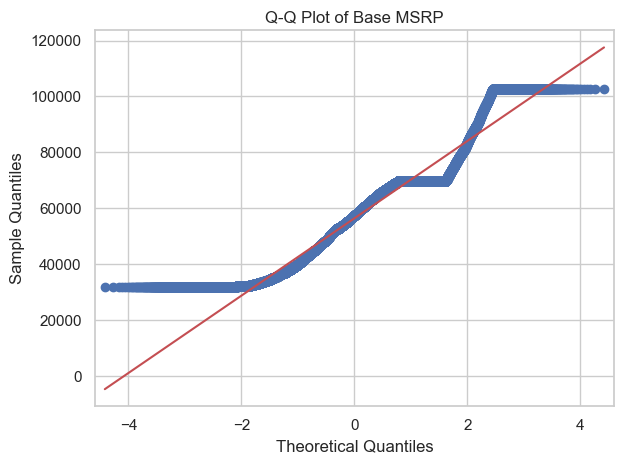

In [98]:
plt.figure(figsize=(5, 5))

# Histogram and KDE for Base MSRP
plt.subplot(121)
sns.histplot(population_data['Base MSRP'], kde=True)
plt.title('Distribution of Base MSRP')
plt.xlabel('Base MSRP')

# Q-Q Plot for Base MSRP
plt.subplot(122)
qqplot(population_data['Base MSRP'], line='s')
plt.title('Q-Q Plot of Base MSRP')

plt.tight_layout()
plt.show()


Insights 
Histogram: The histogram reveals a right-skewed distribution of base MSRPs. This means that there is a tail of higher-priced vehicles, while most vehicles are clustered in the lower MSRP range. There appears to be a significant peak around the $80,000 mark, indicating a concentration of vehicles in this price range.
Q-Q Plot: The Q-Q plot shows a deviation from a straight line, particularly in the tails. This indicates that the distribution of base MSRPs is not perfectly normal. The deviation in the right tail aligns with the right-skewness observed in the histogram.
Shapiro-Wilk:The statistic of 0.8505 indicates a departure from normality. p-value: The p-value is less than the common significance level of 0.05. This suggests that you can reject the null hypothesis, which states that the data is normally distributed.


#### 8.3 Shapiro-Wilk Test
IT refers to a situation in regression analysis where two or more predictor variables are highly correlated with each other. This high correlation can create problems in estimating the relationship between each predictor and the response variable. Here are some key points about multicollinearity:



In [99]:

# Shapiro-Wilk Test
shapiro_test = stats.shapiro(population_data['Base MSRP'])
print(f"\nShapiro-Wilk Test for Electric Range:")
print(f"Statistic: {shapiro_test.statistic:.4f}, p-value: {shapiro_test.pvalue:.4f}")




Shapiro-Wilk Test for Electric Range:
Statistic: 0.9525, p-value: 0.0000


C:\ProgramData\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning:

scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 199600.



Shapiro-Wilk Statistic: A value close to 1 suggests that the data is normally distributed. In your case, the statistic of 0.9525 indicates a departure from normality.

p-value: The p-value is less than the common significance level of 0.05. This suggests that you can reject the null hypothesis, which states that the data is normally distributed.

#### 8.4  Homoscedasticity Check
Homoscedasticity refers to the assumption that the variance of the errors (residuals) in a regression model is constant across all levels of the independent variable(s). In simpler terms, it means that the spread or dispersion of the residuals is uniform across the range of predicted values. This assumption is crucial for many statistical tests and regression analyses, as violations can lead to inefficient estimates and affect the validity of hypothesis tests.





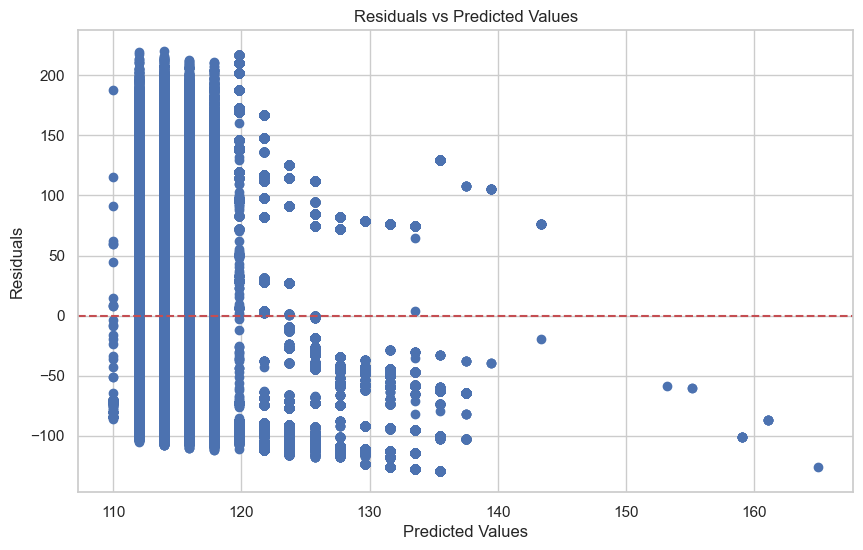

In [81]:
# Step 5: Homoscedasticity Check
X = sm.add_constant(population_data['Model Year'])
y = population_data['Electric Range']
model = sm.OLS(y, X).fit()
residuals = model.resid

plt.figure(figsize=(10, 6))
plt.scatter(model.predict(), residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()


In [82]:

# Breusch-Pagan Test
bp_test = het_breuschpagan(residuals, model.model.exog)
print("\nBreusch-Pagan Test for Homoscedasticity:")
print(f"LM Statistic: {bp_test[0]:.4f}, p-value: {bp_test[1]:.4f}")
numeric_columns = population_data.select_dtypes(include=[np.number]).columns




Breusch-Pagan Test for Homoscedasticity:
LM Statistic: 2733.3329, p-value: 0.0000


ValueError: num must be an integer with 1 <= num <= 9, not 10

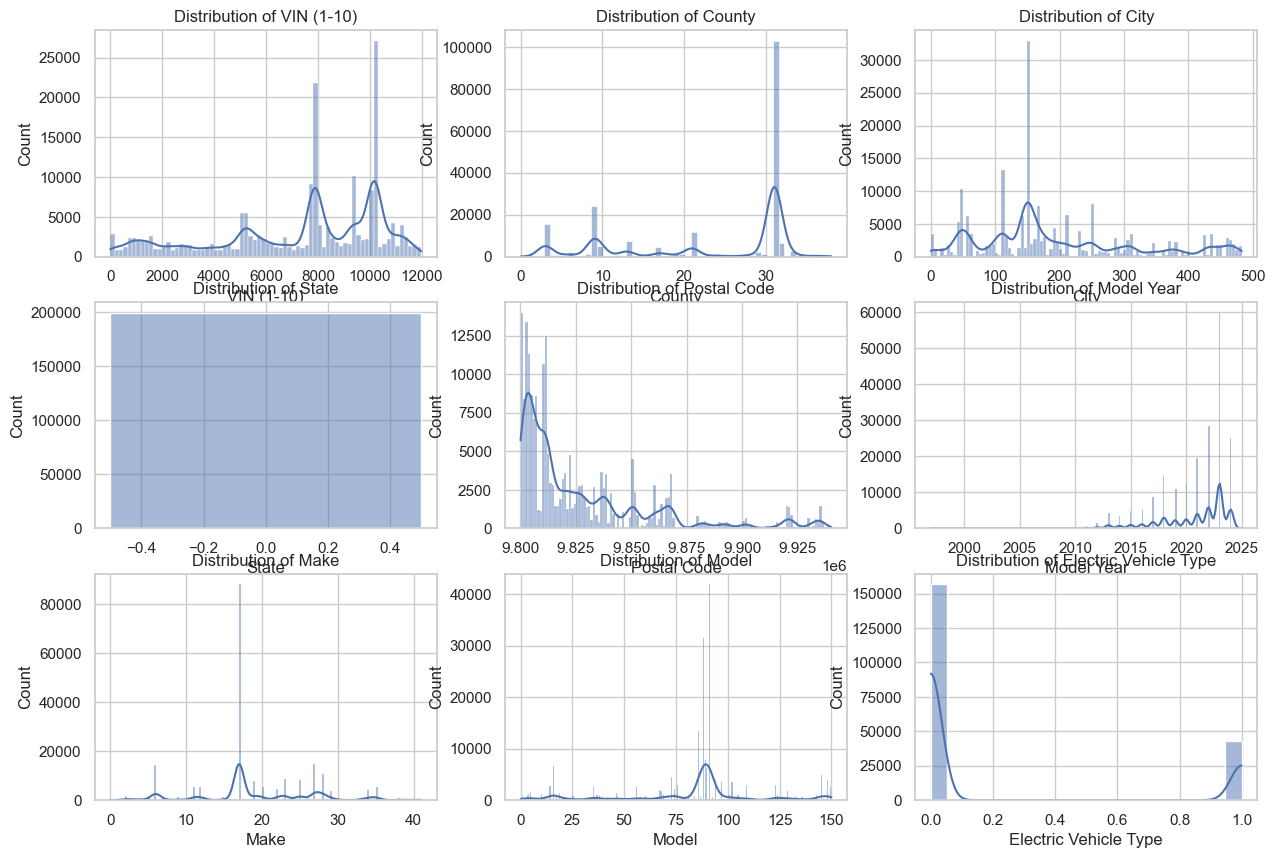

In [83]:

# Step 6: Feature Distribution
plt.figure(figsize=(15, 10))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(population_data[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
plt.tight_layout()
plt.show()


In [ ]:

# Step 7: Boxplot for categorical variables
categorical_columns = population_data.select_dtypes(include=['object']).columns
plt.figure(figsize=(15, 10))
for i, column in enumerate(categorical_columns[:6], 1):  # Limit to first 6 categorical variables
    plt.subplot(2, 3, i)
    sns.boxplot(x=column, y='Electric Range', data=population_data)
    plt.title(f'{column} vs Electric Range')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 9. Preliminary Insights and Hypotheses
•
Identify Key Findings: Summarize key insights derived from the analysis.
•
Generate Hypotheses: Formulate potential hypotheses based on the EDA to be tested in further analysis.

In [114]:
# 1. One-way ANOVA: Impact of 'Electric Vehicle Type' on MSRP
electric_vehicle_type_groups = population_data.groupby('Electric Vehicle Type')['Base MSRP'].apply(list)
f_stat, p_value = stats.f_oneway(*electric_vehicle_type_groups)
print(f"ANOVA for Electric Vehicle Type on MSRP: F-statistic = {f_stat}, p-value = {p_value}")


ANOVA for Electric Vehicle Type on MSRP: F-statistic = 2.885256923925114, p-value = 0.08939530448118077


In [115]:
# 3. One-way ANOVA: Impact of 'County' on MSRP
county_groups = population_data.groupby('County')['Base MSRP'].apply(list)
f_stat, p_value = stats.f_oneway(*county_groups)
print(f"ANOVA for County on MSRP: F-statistic = {f_stat}, p-value = {p_value}")


ANOVA for County on MSRP: F-statistic = 5.832236054290399, p-value = 9.244268858229643e-28


In [121]:
# 1. One-way ANOVA: Impact of 'Is Premium Vehicle' on MSRP
premium_groups = df.groupby('Is Premium Vehicle')['Base MSRP'].apply(list)
f_stat, p_value = stats.f_oneway(*premium_groups)
print(f"ANOVA for Is Premium Vehicle on MSRP: F-statistic = {f_stat}, p-value = {p_value}")

ANOVA for Is Premium Vehicle on MSRP: F-statistic = 394818.7933896915, p-value = 0.0


Since the p-value is extremely small (essentially zero), we can confidently reject the null hypothesis. This indicates that there is a significant difference in the mean Base MSRP between premium and non-premium vehicles.

In [124]:
# 3. Linear Regression: Impact of 'Price per Electric Range' on MSRP
X_price_per_range = df['Price per Electric Range']
X_price_per_range = sm.add_constant(X_price_per_range)  # Add a constant for the intercept
model_price_per_range = sm.OLS(y, X_price_per_range).fit()
print("Linear Regression for Price per Electric Range on MSRP:")
print(model_price_per_range.summary())

Linear Regression for Price per Electric Range on MSRP:
                            OLS Regression Results                            
Dep. Variable:              Base MSRP   R-squared:                       0.042
Model:                            OLS   Adj. R-squared:                  0.042
Method:                 Least Squares   F-statistic:                     8811.
Date:                Mon, 07 Oct 2024   Prob (F-statistic):               0.00
Time:                        15:21:16   Log-Likelihood:            -2.1820e+06
No. Observations:              199600   AIC:                         4.364e+06
Df Residuals:                  199598   BIC:                         4.364e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------

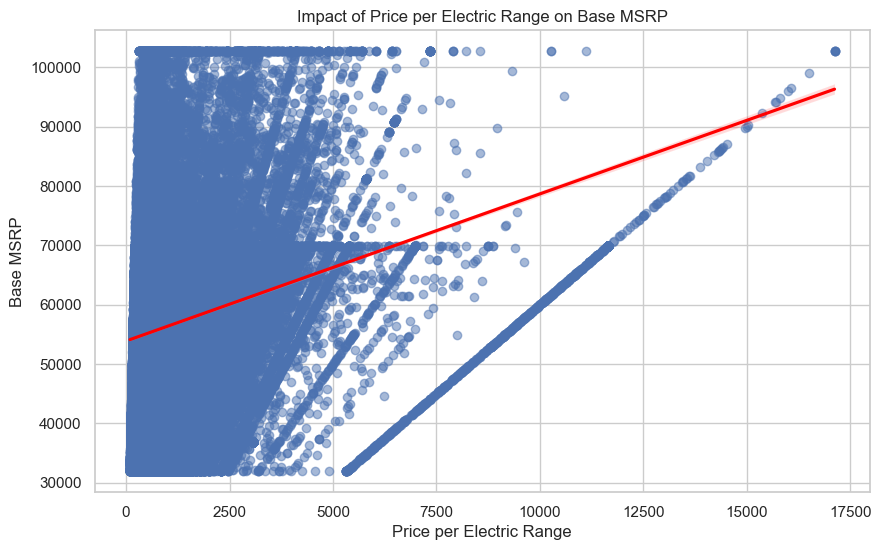

In [125]:

# Scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='Price per Electric Range', y='Base MSRP', data=df, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Impact of Price per Electric Range on Base MSRP')
plt.xlabel('Price per Electric Range')
plt.ylabel('Base MSRP')
plt.grid(True)
plt.show()